# I. Introduction

## Identity
Nama : Mukhlish Rasyidi

Batch: 18

## Dataset 
Dataset yang digunakan adalah h8dsft_P1G2_mukhlish_rasyidi.csv hasil Query dari dataset ml_datasets database credit_card_default BigQuery.

## Objective
Objective project model ini adalah membuat model klasifikasi untuk memprediksi apakah customer akan terklasifikasi sebagai default payment atau tidak. Berdasarkan referensi dari website 'paisabazaar' [What happen when you defaults on credit card](https://www.paisabazaar.com/credit-card/what-happens-when-you-default-on-credit-cards/#:~:text=A%20payment%20default%20occurs%20when,after%206%20consecutive%20missed%20payments.)  Default_payment adalah kondisi dimana customer dianggap gagal bayar dalam beberapa bulan dari sejak tagihan dikeluarkan.

Objective yang kedua dalam project ini adalah membandingkan algoritma- algoritma dari klasifikasi untuk memprediksi default pembayaran tersebut dengan hasil yang terbaik. 

Untuk case ini sebagai perusahaan credit card yang harus berusaha mengurangi kerugian dari customer yang tidak bayar,  maka yang harus dipertimbangkan adalah ketepatan dalam memprediksi customer yang gagal bayar (target positif) dari keseluruhan real customer yang gagal bayar (true positif+ false negatif). Model yang dicari adalah harus yang memiliki nilai tertinggi sehingga bisa mengurangi resiko dari customer yang gagal bayar namun terprediksi tidak gagal bayar.


## Query SQL

Berikut Scrip Query SQL dengan ketentuan intruksi tugas:



```
SELECT 
limit_balance,
CAST (sex AS INT64) as sex,
CAST (education_level AS INT64) as education_level,
CAST (marital_status AS INT64) as marital_status,
age,
pay_0,
pay_2,
pay_3,
pay_4,
CAST (pay_5 AS FLOAT64) as pay_5,
CAST (pay_6 AS FLOAT64) as pay_6,
bill_amt_1,
bill_amt_2,
bill_amt_3,
bill_amt_4,
bill_amt_5,
bill_amt_6,
pay_amt_1,
pay_amt_2,
pay_amt_3,
pay_amt_4,
pay_amt_5,
pay_amt_6,
CAST (default_payment_next_month AS INT64) as default_payment_next_month
 FROM `bigquery-public-data.ml_datasets.credit_card_default` LIMIT 35838
```



# II. Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from graphviz import Source
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.metrics import specificity_score
from sklearn.preprocessing import RobustScaler

# III. Data Loading

In [2]:
# Read dataset
df = pd.read_csv('https://raw.githubusercontent.com/mukhlishr/rasyidi/main/h8dsft_P1M1_mukhlish_rasyidi.csv')

In [3]:
# Set max display columns
pd.set_option("display.max.columns", None)

In [4]:
# Show the first 10 data
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,0.0,61454.0,61808.0,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,0.0,49221.0,49599.0,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,0.0,19568.0,19420.0,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,0.0,18457.0,22815.0,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,0.0,159919.0,68686.0,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
5,300000.0,2,4,2,32.0,0.0,0.0,0.0,0.0,0.0,-1.0,54053.0,65235.0,64747.0,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0,0
6,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,0.0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
7,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,0.0,192461.0,195970.0,122214.0,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
8,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,0.0,133598.0,167378.0,171106.0,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
9,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,0.0,160879.0,161797.0,165107.0,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0


In [5]:
# Show the last 10 data
df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,1968.0,459.0,2500.0,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2956,100000.0,1,3,1,40.0,0.0,0.0,-1.0,-1.0,-2.0,-2.0,12878.0,7702.0,2377.0,0.0,0.0,0.0,2000.0,2377.0,40000.0,0.0,0.0,0.0,0
2957,30000.0,2,3,1,48.0,1.0,-1.0,-1.0,-2.0,-2.0,-2.0,-100.0,100.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0
2958,80000.0,2,3,1,39.0,-1.0,-1.0,-1.0,-1.0,-2.0,-1.0,5280.0,5000.0,5000.0,0.0,0.0,5000.0,5000.0,5000.0,0.0,5000.0,5000.0,470.0,0
2959,20000.0,1,3,2,26.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,96.0,780.0,0.0,0.0,0.0,0.0,1560.0,0.0,0.0,0.0,0.0,0.0,0
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,4280.0,2800.0,0.0,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,752.0,300.0,5880.0,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,1473.0,390.0,390.0,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0
2964,290000.0,2,2,1,39.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-70.0,9540.0,390.0,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0,0


In [6]:
# Check overall dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Berdasarkan pengecekan data secara umum diketahui data set ini hanya berisi column numeric dengan jenis continous dan descret. Untuk yang descrete bertipe INT64 dan continous bertipe float64

In [7]:
# Duplicate dataset
df_ori = df.copy()

# IV Exploratory Data (EDA)

## Check Missing Values

In [8]:
# Check missing values
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

Terlihat dari hasil pengecekan tidak ada data yang missing values di semua columns.

## Check columns numeric discrete (INT64 type)

Dari type data diketahui 4 columns yang bertipe INT 64 atau numeric discrete yaitu columns 'sex', 'education_level', 'marital_status', dan 'default_payment'. 

Namun bila dilihat dari definisi schema columns, Columns pay_(1-6) juga termasuk discrete yaitu sebagai index label. -1 = jenis pembayaran seadanya, 0 sesuai kriteria, 1 payment delay 1 month, dan seterusnya. Sehingga untuk pengecekan columnnya juga akan tetap disamakan dengan yang discrete type.


In [9]:
# Function to visualize columns numeric discrete
def diagnostic_plots(df):
    # Barplot

    fig, ax=plt.subplots(figsize=(10,5))
    sns.barplot(x=df.index, y=df)
    plt.xticks(rotation='vertical')
    plt.title('Barplot')


    plt.show()

### Check column 'sex'

sex


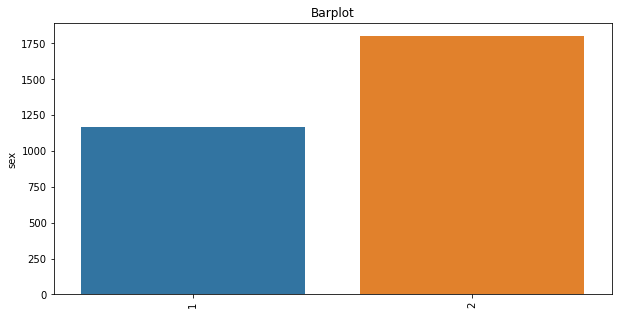

Number of categories in the variable sex : 2
Var in the variable sex : 
 1    39.224283
2    60.775717
Name: sex, dtype: float64


In [10]:
# Visualize Categoric columns numeric discrete (int type)
print('sex')
diagnostic_plots(df['sex'].value_counts())

# Check variance of column
print('Number of categories in the variable sex : {}'.format(len(df.sex.unique())))
print('Var in the variable sex : \n', (df['sex'].value_counts().sort_index())/(df['sex'].shape[0]) * 100)


Diketahui dari visualisasi data dan pengecekan variable untuk jenis  sex hanya ada 2 yaitu dengan deskripsi 1 untuk male dan 2 untuk female. Dari proporsinya Female lebih banyak 639 data dibanding male, atau secara persentase pengguna kartu kredit terbanyak adalah female 60.7% dan male 39.3%

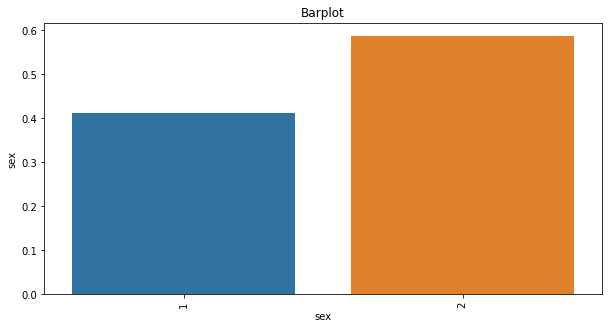

sex
1    0.412598
2    0.587402
Name: sex, dtype: float64

In [11]:
# Perbandingan column sex dengan target
diagnostic_plots(df[df['default_payment_next_month']==1].groupby(['sex'])['sex'].count()/df[df['default_payment_next_month']==1].shape[0])
df[df['default_payment_next_month']==1].groupby(['sex'])['sex'].count()/df[df['default_payment_next_month']==1].shape[0]

Terlihat dari data yang berstatus default payment positif dari column sex , untuk Females lebih banyak dibanding  male.

### Check column 'education_level'

education_level


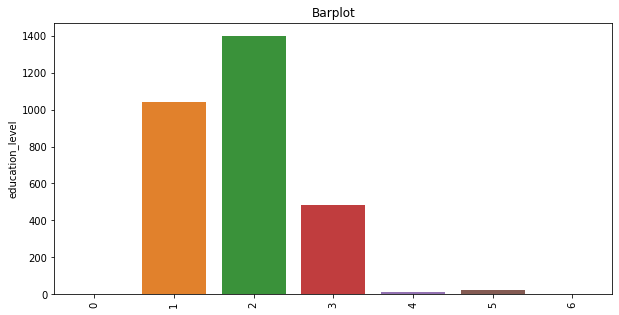

Number of categories in the variable education_level: 7
Var in the variable education level : 
 0     0.067454
1    35.042159
2    47.217538
3    16.290051
4     0.438449
5     0.809444
6     0.134907
Name: education_level, dtype: float64


In [12]:
# Visualize column
print('education_level')
diagnostic_plots(df['education_level'].value_counts())

# Check variance of column
print('Number of categories in the variable education_level: {}'.format(len(df.education_level.unique())))
print('Var in the variable education level : \n', (df['education_level'].value_counts().sort_index())/(df['education_level'].shape[0]) * 100)


Berdasarkan schema dataset untuk education level hanya ada untuk angka 1 sampai dengan 6, namun dari pengecekan terdapat angka 0. akan dilakukan pengecekan lebih untuk yang angka 0. Dari sebaran datanya terbanyak pada education level 2, yaitu University mencapai 47.2%.

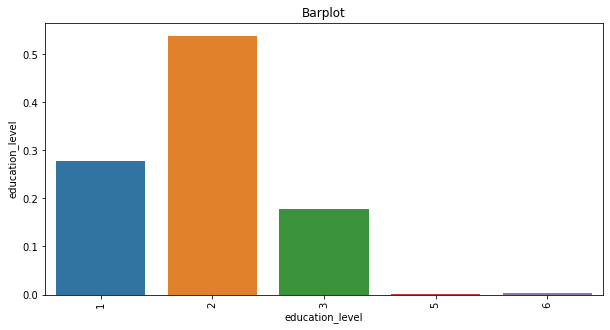

education_level
1    0.278740
2    0.538583
3    0.177953
5    0.001575
6    0.003150
Name: education_level, dtype: float64

In [13]:
# Perbandingan column education dengan target
diagnostic_plots(df[df['default_payment_next_month']==1].groupby(['education_level'])['education_level'].count()/df[df['default_payment_next_month']==1].shape[0])
df[df['default_payment_next_month']==1].groupby(['education_level'])['education_level'].count()/df[df['default_payment_next_month']==1].shape[0]

Terlihat dari proporsi column education, index 2 adalah yang paling banyak sebagai default_payment. dari column ini menunjukan pengaruh dari education level terhadap taget.

In [14]:
# Check column education_level which have value null
df[df['education_level'] == 0]

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2749,100000.0,1,0,2,37.0,0.0,0.0,-2.0,-2.0,-2.0,-2.0,7642.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2750,250000.0,1,0,1,35.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,22839.0,7745.0,12035.0,33604.0,0.0,1190.0,7783.0,12046.0,33718.0,0.0,1190.0,590.0,0


Dari pengecekan terlihat bahwa terdapat 2 baris yang memiliki nilai education level = 0, dibagian feature engeineering akan diimputasi degan nilai index terbanyak yaitu 2, university.

### Check column 'marital_status'

marital_status


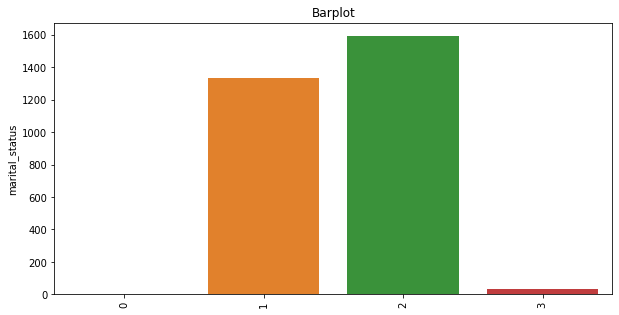

Number of categories in the variable marital_status : 4
Var in the variable marital status : 
 0     0.134907
1    44.924115
2    53.760540
3     1.180438
Name: marital_status, dtype: float64


In [15]:
# Visualize column
print('marital_status')
diagnostic_plots(df['marital_status'].value_counts())

# Check variance of column
print('Number of categories in the variable marital_status : {}'.format(len(df.marital_status.unique())))
print('Var in the variable marital status : \n', (df['marital_status'].value_counts().sort_index())/(df['marital_status'].shape[0]) * 100)


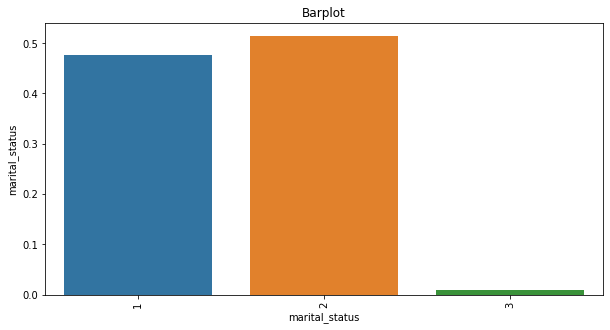

marital_status
1    0.475591
2    0.514961
3    0.009449
Name: marital_status, dtype: float64

In [16]:
# Perbandingan column marital status dengan target
diagnostic_plots(df[df['default_payment_next_month']==1].groupby(['marital_status'])['marital_status'].count()/df[df['default_payment_next_month']==1].shape[0])
df[df['default_payment_next_month']==1].groupby(['marital_status'])['marital_status'].count()/df[df['default_payment_next_month']==1].shape[0]

Terlihat dari persentase column marital_status, dari perbandingan terhadap target positif dengan populasi keseluruhan memiliki kesamaan. Sehingga column ini dianggap tidak memiliki pengaruh terhadap target.

In [17]:
# Check column marital_status which have value null
df[df['marital_status'] == 0]

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
1248,110000.0,2,3,0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,89955.0,89989.0,84229.0,79288.0,73315.0,63818.0,7908.0,4000.0,5000.0,3000.0,3000.0,3000.0,0
1802,100000.0,2,3,0,56.0,1.0,2.0,0.0,0.0,2.0,2.0,28625.0,27969.0,28812.0,31134.0,30444.0,32460.0,0.0,1500.0,2700.0,0.0,2400.0,0.0,0
2095,50000.0,1,3,0,50.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,45771.0,23343.0,0.0,3400.0,2769.0,0.0,2266.0,0.0,3400.0,2769.0,1700.0,0.0,0
2665,200000.0,2,3,0,45.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,399.0,2430.0,0.0,399.0,1396.0,0.0,2430.0,0.0,399.0,1396.0,0.0,0.0,0


Dari column marital_status juga terlihat adanya outlier atau salah input dengan angka 0. Berdasarkan schema marital status index mulai dari 1 sampai dengan 3. Tidak ada angka 0, dan nnti akan diimputasi dengan index terbanyak, yaitu index 2, single.

Mayoritas terbanyak marital status adalah 2 yaitu unmarried dengan persentase 53.76% dari keseluruhan.

### Check column 'default_payment_next_month'

default_payment_next_month


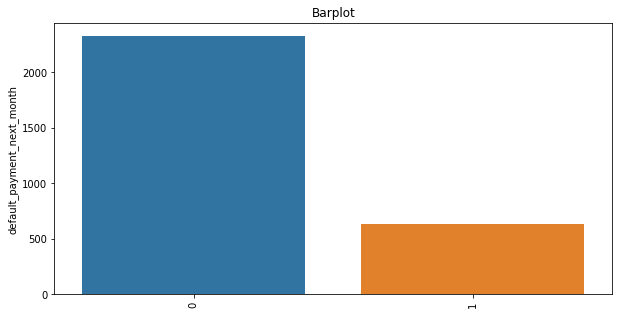

Number of categories in the variable default_payment_next_month : 2
Var in the variabledefault_payment_next_mont : 
 0    78.583474
1    21.416526
Name: default_payment_next_month, dtype: float64


In [18]:
# Visualize column
print('default_payment_next_month')
diagnostic_plots(df['default_payment_next_month'].value_counts())

# Check variance of column
print('Number of categories in the variable default_payment_next_month : {}'.format(len(df.default_payment_next_month.unique())))
print('Var in the variabledefault_payment_next_mont : \n', (df['default_payment_next_month'].value_counts().sort_index())/(df['default_payment_next_month'].shape[0]) * 100)


Berdasarkan visualisasi column default_payment_next_month yang akan dijadikan target sudah dalam bentuk binary. Index 1 untuk yes dan index 0 untuk no. Terlihat dari data target, nilainya tidak balance. Proporsi 0 78.58% dan proporsi 1 hanya 21.41% atau perbandingan 3:1. 

### Check column 'pay_(0-6)'

pay_0


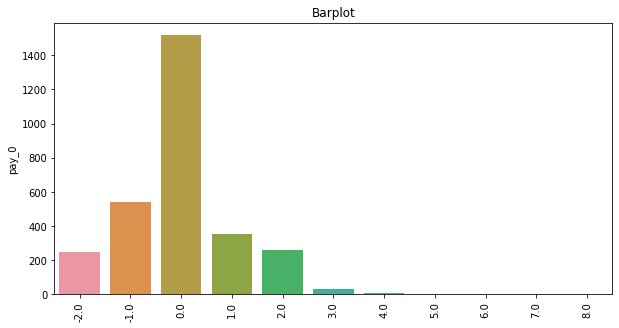

Var in the variable pay_0 : 
 -2.0     8.330523
-1.0    18.212479
 0.0    51.129848
 1.0    12.006745
 2.0     8.836425
 3.0     0.978078
 4.0     0.236088
 5.0     0.067454
 6.0     0.033727
 7.0     0.067454
 8.0     0.101180
Name: pay_0, dtype: float64


In [19]:
# Check columns pay_0 - pay_6

# Visualize column
print('pay_0')
diagnostic_plots(df['pay_0'].value_counts())
# Check var of column
print('Var in the variable pay_0 : \n', (df['pay_0'].value_counts().sort_index())/(df['pay_0'].shape[0]) * 100)


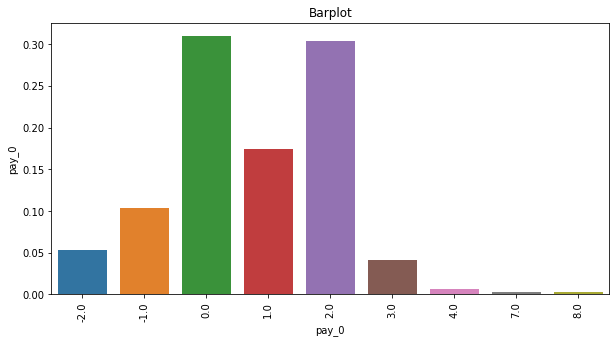

In [20]:
# Perbandingan column pay_n dengan target
diagnostic_plots(df[df['default_payment_next_month']==1].groupby(['pay_0'])['pay_0'].count()/635)

In [21]:
# Check column pay_0 which have value -2
df[df['pay_0'] == -2]

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
1053,110000.0,2,2,1,46.0,-2.0,-1.0,0.0,0.0,0.0,0.0,1495.0,83590.0,82293.0,78622.0,78430.0,78120.0,86367.0,2846.0,2755.0,2838.0,2808.0,2740.0,0
1054,310000.0,2,2,2,42.0,-2.0,-1.0,0.0,0.0,0.0,0.0,-2123.0,246407.0,250249.0,254254.0,259960.0,265702.0,260000.0,10000.0,10000.0,10000.0,10000.0,10000.0,0
1298,280000.0,1,3,2,38.0,-2.0,-1.0,0.0,0.0,0.0,0.0,192080.0,197796.0,314042.0,116480.0,118270.0,124742.0,5716.0,117698.0,3884.0,3376.0,7503.0,3591.0,0
1360,80000.0,1,1,2,33.0,-2.0,-1.0,2.0,0.0,0.0,0.0,251594.0,264594.0,4374.0,5495.0,5902.0,6804.0,13000.0,0.0,1200.0,500.0,1000.0,1000.0,0
1501,60000.0,2,2,2,48.0,-2.0,-2.0,-2.0,-1.0,0.0,0.0,53044.0,51158.0,29452.0,1696.0,38585.0,38884.0,1607.0,1675.0,1696.0,38000.0,1500.0,1400.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2902,300000.0,2,3,2,30.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2903,50000.0,2,3,2,22.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,2498.0,-2.0,1697.0,0.0,0.0,5000.0,0.0,1699.0,0.0,0.0,5000.0,0.0,0
2904,360000.0,2,3,2,42.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1


Dari pengecekan column pay_0 terlihat adanya outlier yaitu -2 diluar dari schema index untuk column pay_0 sampai dengan column pay_6. Untuk nilai tersebut akan diimputasi dengan index terbanyak yaitu index 0 dengan persentase 51%.

pay_2


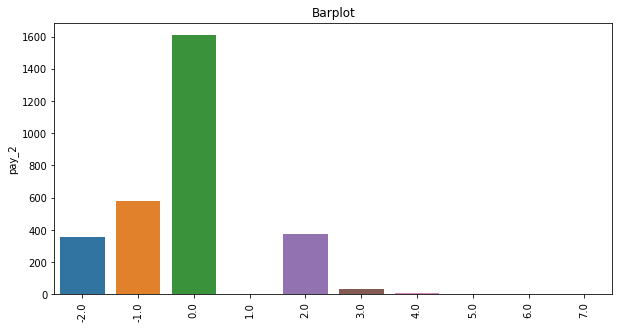

Var in the variable pay_2 : 
 -2.0    11.905565
-1.0    19.561551
 0.0    54.198988
 1.0     0.134907
 2.0    12.613828
 3.0     1.079258
 4.0     0.269815
 5.0     0.067454
 6.0     0.067454
 7.0     0.101180
Name: pay_2, dtype: float64


In [22]:
# Visualize column
print('pay_2')
diagnostic_plots(df['pay_2'].value_counts())
# Check var of column
print('Var in the variable pay_2 : \n', (df['pay_2'].value_counts().sort_index())/(df['pay_2'].shape[0]) * 100)

Untuk column pay_2 juga memiliki outliers namun nilainya lebih banyak, mencapai 11% dari keseluruhan. Untuk ini juga dilakukan imputasi dengan index terbanyak yaitu index 0 (54%). 

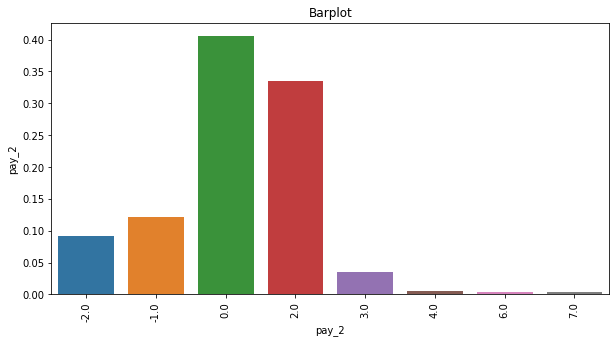

In [23]:
# Perbandingan column pay_n dengan target
diagnostic_plots(df[df['default_payment_next_month']==1].groupby(['pay_2'])['pay_2'].count()/635)

pay_3


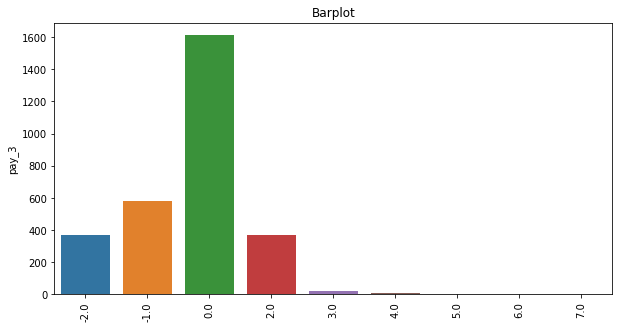

Var in the variable pay_3 : 
 -2.0    12.377740
-1.0    19.561551
 0.0    54.300169
 2.0    12.411467
 3.0     0.741990
 4.0     0.269815
 5.0     0.101180
 6.0     0.134907
 7.0     0.101180
Name: pay_3, dtype: float64


In [24]:
# Visualize column pay_3
print('pay_3')
diagnostic_plots(df['pay_3'].value_counts())
# Check var of column
print('Var in the variable pay_3 : \n', (df['pay_3'].value_counts().sort_index())/(df['pay_3'].shape[0]) * 100)

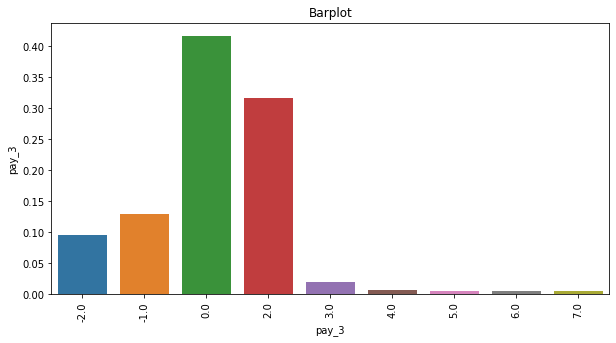

In [25]:
# Perbandingan column pay_n dengan target
diagnostic_plots(df[df['default_payment_next_month']==1].groupby(['pay_3'])['pay_3'].count()/635)

Untuk pay_3 juga memiliki outliers -2 sebanyak 12.37 %, akan dihandling seperti column pay sebelumnya. 

pay_4


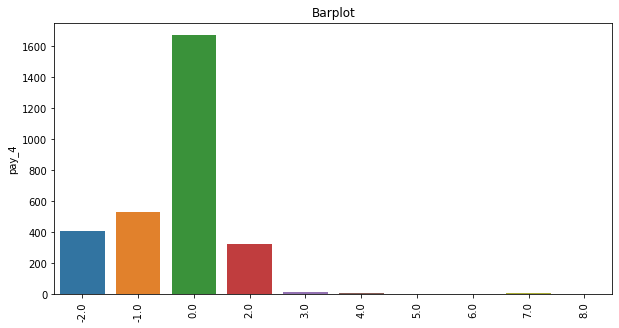

Var in the variable pay_4 : 
 -2.0    13.760540
-1.0    17.942664
 0.0    56.222597
 2.0    10.927487
 3.0     0.472175
 4.0     0.236088
 5.0     0.168634
 6.0     0.033727
 7.0     0.202361
 8.0     0.033727
Name: pay_4, dtype: float64


In [26]:
# Visualize column pay_4
print('pay_4')
diagnostic_plots(df['pay_4'].value_counts())
# Check var of column
print('Var in the variable pay_4 : \n', (df['pay_4'].value_counts().sort_index())/(df['pay_4'].shape[0]) * 100)

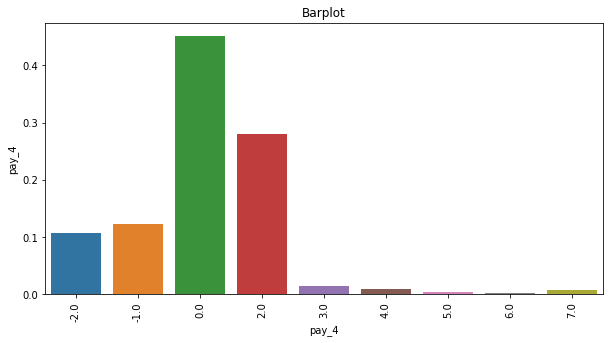

In [27]:
# Perbandingan column pay_n dengan target
diagnostic_plots(df[df['default_payment_next_month']==1].groupby(['pay_4'])['pay_4'].count()/635)

Column pay_4 juga sama dengan column pay sebelumnya, terdapat outlier -2 sebanyak 13.76%

pay_5


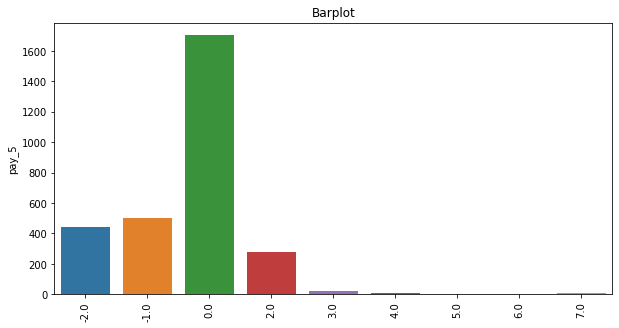

Var in the variable pay_5 : 
 -2.0    14.873524
-1.0    16.998314
 0.0    57.403035
 2.0     9.443508
 3.0     0.640809
 4.0     0.303541
 5.0     0.067454
 6.0     0.033727
 7.0     0.236088
Name: pay_5, dtype: float64


In [28]:
# Visualize column pay_5
print('pay_5')
diagnostic_plots(df['pay_5'].value_counts())
# Check var of column
print('Var in the variable pay_5 : \n', (df['pay_5'].value_counts().sort_index())/(df['pay_5'].shape[0]) * 100)

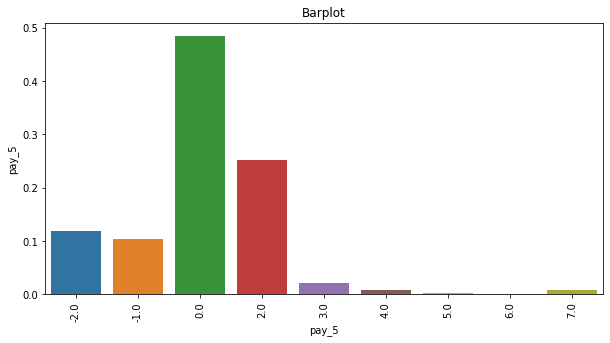

In [29]:
# Perbandingan column pay_n dengan target
diagnostic_plots(df[df['default_payment_next_month']==1].groupby(['pay_5'])['pay_5'].count()/635)

Column pay_5 juga memiliki outlier -2 sebanyak 14.87%, akan dihandling dibagian feature engineering

pay_6


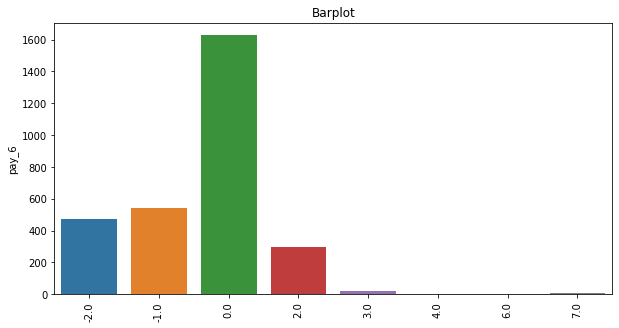

Var in the variable pay_6 : 
 -2.0    15.851602
-1.0    18.212479
 0.0    54.839798
 2.0    10.016863
 3.0     0.708263
 4.0     0.067454
 6.0     0.101180
 7.0     0.202361
Name: pay_6, dtype: float64


In [30]:
# Visualize column pay_6
print('pay_6')
diagnostic_plots(df['pay_6'].value_counts())
# Check var of column
print('Var in the variable pay_6 : \n', (df['pay_6'].value_counts().sort_index())/(df['pay_6'].shape[0]) * 100)

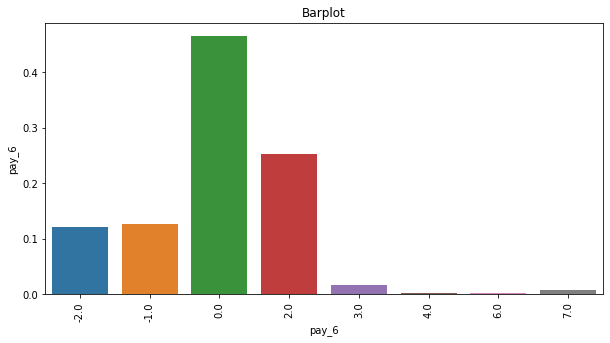

In [31]:
# Perbandingan column pay_n dengan target
diagnostic_plots(df[df['default_payment_next_month']==1].groupby(['pay_6'])['pay_6'].count()/635)

Column pay_6 juga memiliki outliers sebanyak 15.85 %. akan dilakukan imputasi dengan nilai index terbanyak. 

Dapat disimpulkan untuk semua columns pay_0 sampai dengan pay_6 terdapat outliers index -2 dan akan dihandling dibagian Feature Engineering.


Bila melihat dari perbandingan antara pay_n dengan target, semuanya memiliki pattern yang sama. Dimana pay_n dengan index 2 memiliki pengaruh yang paling tinggi dibanding populasi awal. Dari sini juga terlihat pengaruh dari column pay_n terhdapat target

## Check columns numeric continous (float64 type)

Pada bagian ini akan dilakukan pengecekan hanya untuk column limit balance dan age. Untuk columns bill_amt dan pay_amt akan dilakukan rekayasa pola terlebih dahulu di feature engineering. 

In [32]:
# Function to create histogram and boxplot.
# Function takes a dataframe (df) and the variable of interest as arguments

def diagnostic_plots1(df):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df, bins=30, kde=True)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df)
    plt.title('Boxplot')

    plt.show()

In [33]:
# make function to find upper and lower boundaries
def find_skewed_boundaries(dat,distance):
    IQR = dat.quantile(0.75) - dat.quantile(0.25)

    lower_boundary = dat.quantile(0.25) - (IQR * distance)
    upper_boundary = dat.quantile(0.75) + (IQR * distance)


    return upper_boundary, lower_boundary

In [34]:
# Function to find upper and lower boundaries for normally distributed variables
# Calculate the boundaries outside which sit the outliers for a Gaussian distribution

def normal_boundaries(df):
    upper_boundary = df.mean() + 3 * df.std()
    lower_boundary = df.mean() - 3 * df.std()

    return upper_boundary, lower_boundary

### Check column 'limit_balance'

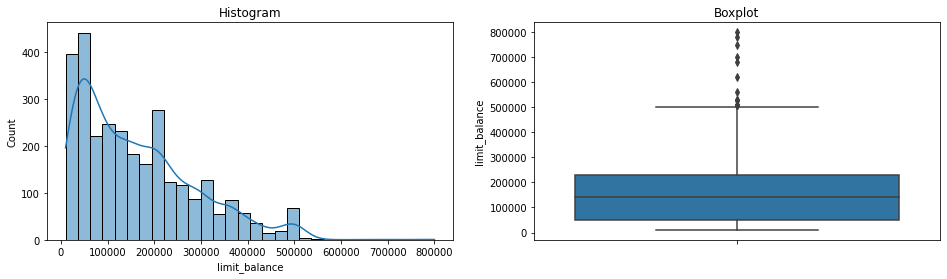

Measurement Scale : count      2965.000000
mean     163369.308600
std      125030.415472
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      230000.000000
max      800000.000000
Name: limit_balance, dtype: float64
Mode : 0    50000.0
Name: limit_balance, dtype: float64
Skew : 1.0004416437793324


In [35]:
# Visualize column 'limit_balance'
diagnostic_plots1(df['limit_balance'])

# Check measurement scale, mode, and skewness
print('Measurement Scale :',df['limit_balance'].describe())
print('Mode :', df['limit_balance'].mode())
print('Skew :', df['limit_balance'].skew())

Dari pengecekan sebaran data limit_balance terlihat sebaran datanya tidak normal mean> Median> mode, dan dari nilai skew lebih dari 1 kategorinya sangat miring ke kanan.

Dari boxplot juga terlihat adanya outlies yang akan dihitung menggunkan IQR dikarenakan distribusi tidak normal. Secara sekilas, limit kartu kredit tertinggi yaitu 500.000 usd berdasarkan sumber [20 Highest Credit Card Credit Limits by Category ](https://www.cardrates.com/advice/credit-card-limits/) , di dataset ini ada nilai limit yang mencapai 800.000 usd.

In [36]:
# Looking for Outliers using rule IQR * 1,5. dueto the distribution is not simetris
upper_boundary, lower_boundary = find_skewed_boundaries(df['limit_balance'],1.5)
print('upper_boundary :', upper_boundary) 
print('lower_boundary :', lower_boundary)
print('')
print('% limit balance higher than 500.000 USD : {}'.format(len(df[df['limit_balance'] > upper_boundary])/len(df) * 100))

upper_boundary : 500000.0
lower_boundary : -220000.0

% limit balance higher than 500.000 USD : 0.4721753794266442


In [37]:
df[df['limit_balance']>500000]

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
11,780000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,0.0,171459.0,178587.0,190663.0,195124.0,184872.0,191090.0,10000.0,15004.0,10000.0,8000.0,10028.0,7003.0,0
138,700000.0,2,1,1,36.0,0.0,0.0,0.0,0.0,0.0,0.0,450827.0,389039.0,328316.0,325968.0,271596.0,286805.0,13000.0,11939.0,10312.0,20004.0,20000.0,20000.0,0
155,530000.0,2,1,2,39.0,0.0,0.0,0.0,0.0,0.0,0.0,439330.0,407763.0,364298.0,345867.0,346676.0,352736.0,17045.0,14089.0,11962.0,11763.0,12557.0,12496.0,0
199,560000.0,2,1,2,32.0,0.0,0.0,0.0,0.0,0.0,0.0,68199.0,31211.0,23991.0,15488.0,12579.0,11400.0,1548.0,1446.0,14720.0,427.0,1000.0,300.0,0
246,680000.0,2,1,1,42.0,0.0,0.0,0.0,0.0,0.0,0.0,189514.0,188883.0,190076.0,181957.0,182226.0,177731.0,8000.0,9000.0,7000.0,7000.0,7000.0,7000.0,0
852,510000.0,2,2,1,38.0,0.0,0.0,0.0,0.0,0.0,0.0,95589.0,35224.0,37361.0,39437.0,40292.0,41153.0,2000.0,2700.0,2700.0,1500.0,1500.0,10000.0,0
1265,510000.0,2,3,1,61.0,0.0,0.0,0.0,2.0,0.0,0.0,187070.0,181733.0,192903.0,181801.0,178179.0,223100.0,8500.0,17000.0,0.0,6508.0,50000.0,7000.0,0
1463,510000.0,2,3,1,61.0,0.0,0.0,2.0,0.0,0.0,0.0,181733.0,192903.0,181801.0,178179.0,223100.0,216225.0,17000.0,0.0,6508.0,50000.0,7000.0,6000.0,0
1524,530000.0,1,1,2,32.0,-2.0,-2.0,-1.0,0.0,0.0,0.0,12451.0,24095.0,15688.0,24511.0,12144.0,34963.0,24120.0,15791.0,12808.0,8090.0,34110.0,90231.0,0
1552,510000.0,2,1,2,30.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,71121.0,481382.0,559712.0,163628.0,117475.0,116656.0,493358.0,1227082.0,164577.0,510.0,6239.0,4550.0,0


Dari hasil perhitungan batas outliers juga memiliki kesesuaian dengan sumber referensi limit kartu kredit. Yaitu diatas 500.000 dianggap sebagai outliers. Persentase outliers diatas batas atas =0.47% atau kurang dari 1 %

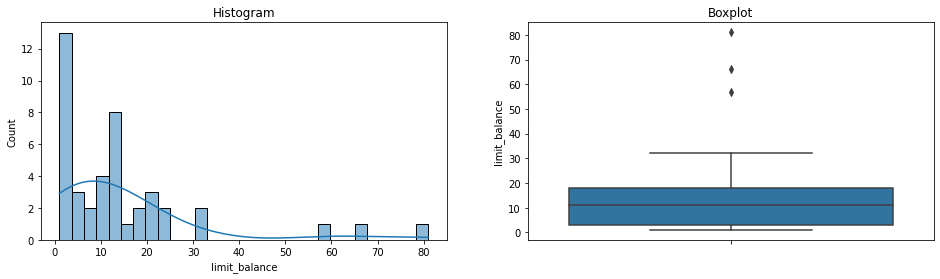

limit_balance
10000.0     21
20000.0     66
30000.0     57
40000.0     14
50000.0     81
60000.0     17
70000.0     19
80000.0     32
90000.0     22
100000.0    31
110000.0    12
120000.0    23
130000.0    14
140000.0    13
150000.0    23
160000.0    10
170000.0     8
180000.0    14
190000.0     3
200000.0    20
210000.0    14
220000.0    11
230000.0     9
240000.0    10
250000.0     3
260000.0    12
270000.0     5
280000.0     3
290000.0     3
300000.0    14
310000.0     2
320000.0     7
330000.0     2
340000.0     4
350000.0     3
360000.0    16
370000.0     2
380000.0     2
390000.0     2
400000.0     2
430000.0     1
450000.0     2
500000.0     6
Name: limit_balance, dtype: int64

In [38]:
# Visualize column 'limit_balance'
diagnostic_plots1(df[df['default_payment_next_month']==1].groupby(['limit_balance'])['limit_balance'].count())

df[df['default_payment_next_month']==1].groupby(['limit_balance'])['limit_balance'].count()

### Check column 'age'

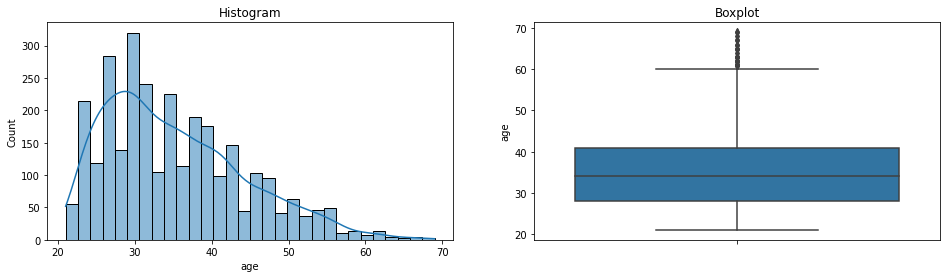

Measurement Scale : count    2965.000000
mean       35.193255
std         9.109439
min        21.000000
25%        28.000000
50%        34.000000
75%        41.000000
max        69.000000
Name: age, dtype: float64
Mode : 0    30.0
Name: age, dtype: float64
Skew : 0.7728871800647298


In [39]:
# Visualize column 'age'
diagnostic_plots1(df['age'])

# Check measurement scale, mode, and skewness
print('Measurement Scale :',df['age'].describe())
print('Mode :', df['age'].mode())
print('Skew :', df['age'].skew())

Dari visualisasi histogram dan nilai skew untuk column age terlihat cukup miring ke kanan,  bila dibandingkan dengan nilai sebaran data juga sesuai mean>median>mode yang berarti distibusi miring ke kanan atau tidak simetris. 

Dari pengecekan boxplot terlihat batasan outliers 60 tahun dan nilai maksimal usia disini adalah 69 tahun, namun bila dilihat kondisi kehidupan nyata untuk untuk usia diatas 60 tahun masih wajar memiliki kartu kredit selama diketahui masih memiliki penghasilan atau kekayaan untuk membayarnya. Outlier age dianggap natural dan tidak akan dihandle. 

## Check Correlation between columns

In [40]:
# Check correlation spearman methode, dueto the data not simetris 
cor = df.corr(method='spearman')

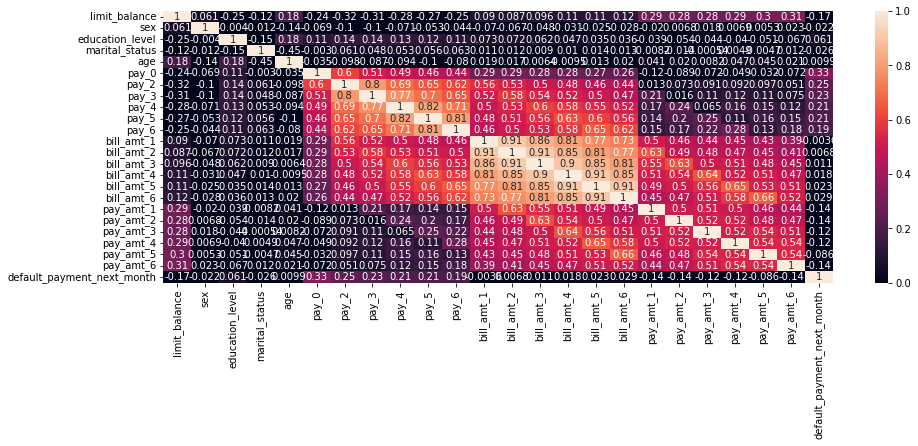

In [41]:
plt.figure(figsize=(15, 5))
sns.heatmap(cor, annot= True, vmin=0, vmax=1)
plt.show()

Terlihat semua columns memiliki korelasi dengan target namun ada yang cukup berkorelasi dan ada yang sangat kecil nilai korelasinya. Untuk mengetahui korelasi menggunakan metode Spearman karena datanya tidak hanya numeric continous, namun ada juga yang label/ discrete. sehingga menggunakan metode spearman.

# V. Feature Engineering

## Create pattern payment

Seseorang dianggap tidak membayar apabila ada tagihan yang masuk namun tidak ada pembayarannya ataupun yang membayar dengan kurang dari ketentuan, misal kurang dari 5 %. 
Berdasarkan hal itu akan dilihat persentase jumlah yang dibayar dengan jumlah tagihan. Apabila nilai nya 0 maka diketahui tidak ada pembayaran dari tagihan sebelumnya, sedangkan nilai 100 adalah pembayaran penuh. Ada kalanya nilai bisa bernilai lebih dari 100, yaitu kondisi customer membayar lebih dari tagihan.

Pada dataset ini dimulai statement dari bulan april yang berarti data tagihan bulan april (bill_amt_6) dan jumlah pembayaran bulan maret (pay_amt_6). Pattern nya bisa dilihat dengan mengetahui persentase pembayaran dengan membagi column pay_amt_(n)/bill_amt_(n+1), dari hasil akan terlihat berapa persen yang dibayarkan leh customer dari total tagihan perbulannya.

Khusus untuk pay_amt_6 bisa didapatkan berapa tagihan bulan maret dengan cara menambahkan bil_amt_6 + pay_amt_6.  

Dari dasar tersebut akan dibuat column baru dengan nilai persentase pembayaran perbulannya.

In [42]:
# Create duplicate data
df1=df.copy()

In [43]:
# Create new column 'percent_mar'
df1['percent_mar']= df1['pay_amt_6']/(df1['pay_amt_6']+df1['bill_amt_6'])*100

# Create new column 'percent_apr'
df1['percent_apr']= df1['pay_amt_5']/df1['bill_amt_6']*100

# Create new column 'percent_may'
df1['percent_may']= df1['pay_amt_4']/df1['bill_amt_5']*100

# Create new column 'percent_june'
df1['percent_june']= df1['pay_amt_3']/df1['bill_amt_4']*100

# Create new column 'percent_july'
df1['percent_july']= df1['pay_amt_2']/df1['bill_amt_3']*100

# Create new column 'percent_aug'
df1['percent_aug']= df1['pay_amt_1']/df1['bill_amt_2']*100


df1.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,percent_mar,percent_apr,percent_may,percent_june,percent_july,percent_aug
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,0.0,61454.0,61808.0,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1,1.934300,3.072040,8.515834,4.560350,3.544710,4.117590
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,0.0,49221.0,49599.0,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0,5.771006,5.103707,6.927441,4.985443,4.247968,3.405311
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,0.0,19568.0,19420.0,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1,NaN,inf,0.000000,62.761506,6.559382,23.898043
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,0.0,18457.0,22815.0,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0,14.330754,3.629977,16.251178,4.086841,18.459721,21.915407
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,0.0,159919.0,68686.0,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0,3.683944,3.216288,3.208370,104.633667,91.131074,5.851265


### Handling infinity and nan values new columns

Untuk bagian ini akan dilakukan handling pada data karena ada penambahan column baru yang dapat bernilai infinity atau N/A, dikarenakan pengaruh dari pembayaran dibagi tagihan. Bila pembayaran 0, tagihan nya 100, maka pecentagenya akan 0. Dan sebaliknya tagihannya 0 namun tetap ada pembayaran, sehingga nilainya infinity. Untuk nilai tersebut akan diimputasi dengan nilai 0

In [44]:
# Check infinity columns dueto payments without the bills
inf_all  = df1.isin([np.inf, -np.inf]).sum()
inf_all

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
percent_mar                   1
percent_apr                   7
percent_may                   7
percent_june                  5
percent_july                  7
percent_aug                   2
dtype: int64

In [45]:
#df1.isinf().sum()
count = np.isinf(df1).values.sum()
count

29

Terdapat 29 data transaksi ada pembayaran namun tidak ada tagihan, sehingga hasilnya infinity. Hal ini bisa terjadi salah input atau kesalahan sistem. umumnya customer akan mencek terlebih dahulu sebelum melakukan pembayaran. Data infinity akan di direplace ke nilai 0 dengan merubah data infinity ke nan terlebih dahulu.

In [46]:
# Replace inf values with nan
df1.replace([np.inf, - np.inf], np.nan, inplace = True) 

In [47]:
# Check missing values
df1.isnull().sum()

limit_balance                   0
sex                             0
education_level                 0
marital_status                  0
age                             0
pay_0                           0
pay_2                           0
pay_3                           0
pay_4                           0
pay_5                           0
pay_6                           0
bill_amt_1                      0
bill_amt_2                      0
bill_amt_3                      0
bill_amt_4                      0
bill_amt_5                      0
bill_amt_6                      0
pay_amt_1                       0
pay_amt_2                       0
pay_amt_3                       0
pay_amt_4                       0
pay_amt_5                       0
pay_amt_6                       0
default_payment_next_month      0
percent_mar                   307
percent_apr                   372
percent_may                   347
percent_june                  306
percent_july                  277
percent_aug   

Terlihat untuk nilai missing value ada pada column baru semua dan akan diimputasi dengan nilai 0.

In [48]:
# Fillna missing values with 0
df1.fillna(0, inplace=True)

In [49]:
df1.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
percent_mar                   0
percent_apr                   0
percent_may                   0
percent_june                  0
percent_july                  0
percent_aug                   0
dtype: int64

sudah tidak ada lagi df1 dengan missing values atau infinity


## Split between `X` (Features) and `y` (Target)

In [50]:
# Splitting between `X` and `y`

X = df1.drop(['default_payment_next_month'], axis=1)
y = df1['default_payment_next_month']
X.head(3)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,percent_mar,percent_apr,percent_may,percent_june,percent_july,percent_aug
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,0.0,61454.0,61808.0,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1.934300,3.072040,8.515834,4.560350,3.544710,4.117590
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,0.0,49221.0,49599.0,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,5.771006,5.103707,6.927441,4.985443,4.247968,3.405311
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,0.0,19568.0,19420.0,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,0.000000,0.000000,0.000000,62.761506,6.559382,23.898043


0    2330
1     635
Name: default_payment_next_month, dtype: int64
Target proportion : 
 0    78.583474
1    21.416526
Name: default_payment_next_month, dtype: float64



<AxesSubplot:xlabel='Target Class', ylabel='Count'>

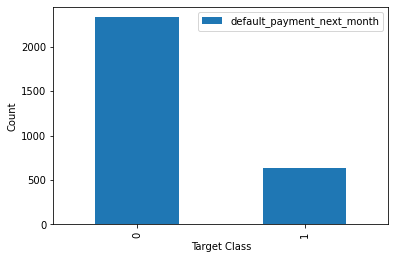

In [51]:
# Check Target Class

print(y.value_counts())
print('Target proportion : \n', (y.value_counts().sort_index())/(y.shape) * 100)
print('')

y.value_counts().plot.bar(xlabel='Target Class', ylabel='Count', legend=True)

Terlihat data imbalance, target positif hanya 21.4 % dengan perbandingan 1:3.

## Split between Train-Set and Test-Set

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19, stratify=y)

print('X_Train Size : ', X_train.shape)
print('X_Test Size  : ', X_test.shape)
print('y_Train Size : ', y_train.shape)
print('y_Test Size  : ', y_test.shape)
X_train.head(3)

X_Train Size :  (2372, 29)
X_Test Size  :  (593, 29)
y_Train Size :  (2372,)
y_Test Size  :  (593,)


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,percent_mar,percent_apr,percent_may,percent_june,percent_july,percent_aug
2055,20000.0,2,2,1,27.0,0.0,0.0,0.0,0.0,-1.0,-1.0,10489.0,8652.0,7143.0,6044.0,780.0,116.0,1222.0,1200.0,1004.0,780.0,116.0,806.0,87.418655,100.0000,100.000000,16.611516,16.799664,14.123902
2204,360000.0,2,1,2,27.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,660.0,660.0,658.0,1095.0,4948.0,3861.0,663.0,661.0,1100.0,4953.0,19.0,1264.0,24.663415,0.4921,100.101051,100.456621,100.455927,100.454545
2427,160000.0,2,2,2,29.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1194.0,2108.0,1086.0,1874.0,2920.0,0.0,2108.0,1086.0,1874.0,2920.0,0.0,1222.0,100.000000,0.0000,100.000000,100.000000,100.000000,100.000000


## Handling outliers


### Handling outliers column pay_0 - pay_6

Measurement scale column percent_mar


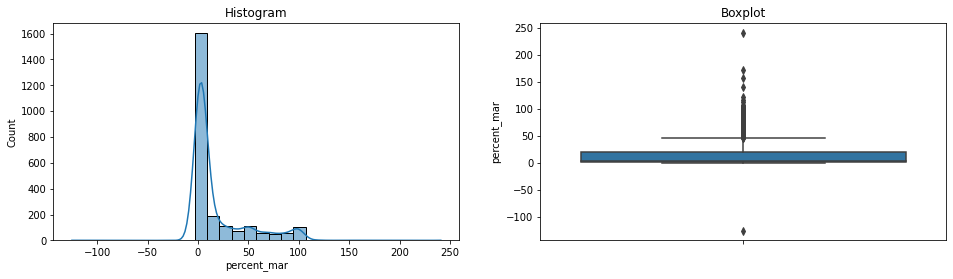

Measurement Scale : count    2372.000000
mean       18.004798
std        28.843667
min      -125.000000
25%         1.670495
50%         4.012257
75%        19.782260
max       240.880936
Name: percent_mar, dtype: float64
Mode : 0    0.0
Name: percent_mar, dtype: float64
Skew : 1.9144543538516134

Measurement scale column percent_apr


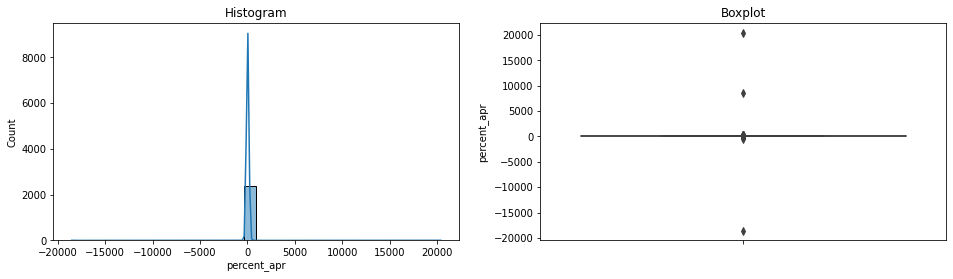

Measurement Scale : count     2372.000000
mean        31.896551
std        594.653728
min     -18533.333333
25%          3.123309
50%          4.434114
75%         37.299531
max      20400.088261
Name: percent_apr, dtype: float64
Mode : 0    0.0
Name: percent_apr, dtype: float64
Skew : 5.401088549406463

Measurement scale column percent_may


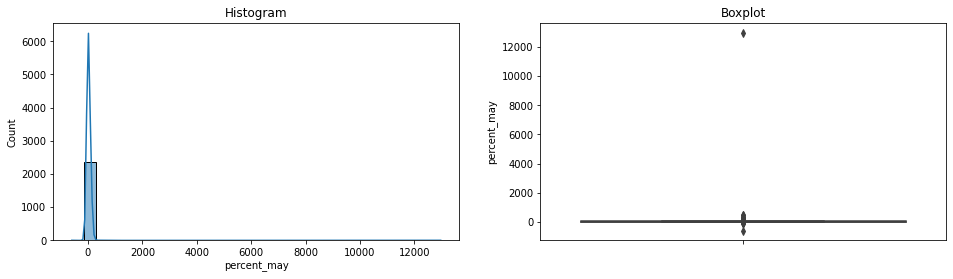

Measurement Scale : count     2372.000000
mean        31.479734
std        269.607865
min       -593.706294
25%          2.391068
50%          4.229742
75%         24.969552
max      12970.512821
Name: percent_may, dtype: float64
Mode : 0    0.0
Name: percent_may, dtype: float64
Skew : 46.66255896936683

Measurement scale column percent_june


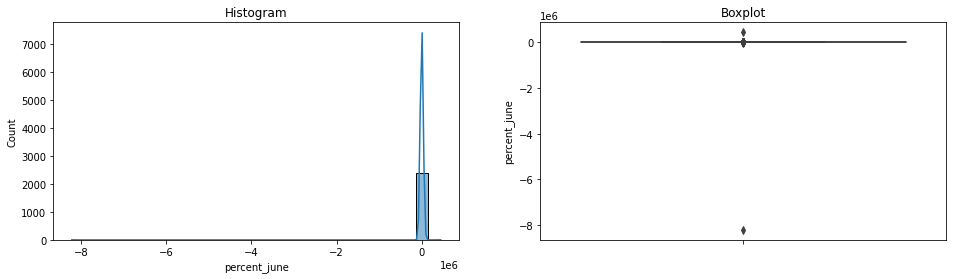

Measurement Scale : count    2.372000e+03
mean    -3.245934e+03
std      1.689259e+05
min     -8.215000e+06
25%      3.099730e+00
50%      4.906351e+00
75%      3.201697e+01
max      4.444333e+05
Name: percent_june, dtype: float64
Mode : 0    0.0
Name: percent_june, dtype: float64
Skew : -48.48230110075144

Measurement scale column percent_july


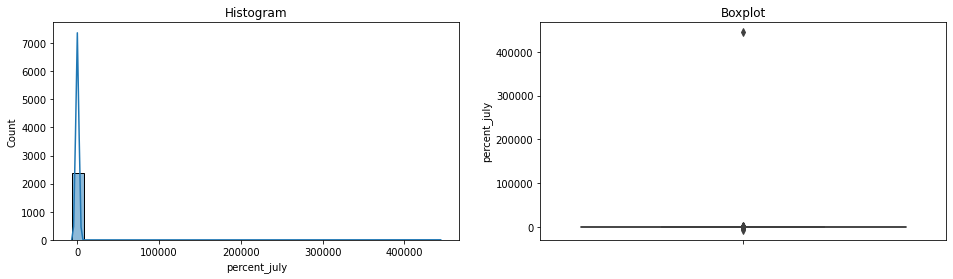

Measurement Scale : count      2372.000000
mean        216.826083
std        9126.180981
min       -6750.000000
25%           3.637506
50%           6.109405
75%          45.033877
max      444433.333333
Name: percent_july, dtype: float64
Mode : 0    0.0
Name: percent_july, dtype: float64
Skew : 48.679935237637075

Measurement scale column percent_aug


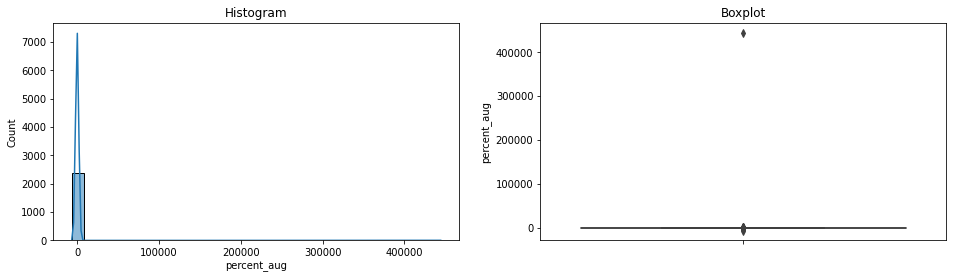

Measurement Scale : count      2372.000000
mean        215.611877
std        9125.891821
min       -6521.739130
25%           3.751026
50%           6.680054
75%          52.075177
max      444433.333333
Name: percent_aug, dtype: float64
Mode : 0    0.0
Name: percent_aug, dtype: float64
Skew : 48.68496652133561


In [53]:
# Visualize column 'percent_mar'
print('Measurement scale column percent_mar')
diagnostic_plots1(X_train['percent_mar'])

# Check measurement scale, mode, and skewness
print('Measurement Scale :',X_train['percent_mar'].describe())
print('Mode :', X_train['percent_mar'].mode())
print('Skew :', X_train['percent_mar'].skew())
print('')

# Visualize column 'percent_apr'
print('Measurement scale column percent_apr')
diagnostic_plots1(X_train['percent_apr'])

# Check measurement scale, mode, and skewness
print('Measurement Scale :',X_train['percent_apr'].describe())
print('Mode :', X_train['percent_apr'].mode())
print('Skew :', X_train['percent_apr'].skew())
print('')

# Visualize column 'percent_may'
print('Measurement scale column percent_may')
diagnostic_plots1(X_train['percent_may'])

# Check measurement scale, mode, and skewness
print('Measurement Scale :',X_train['percent_may'].describe())
print('Mode :', X_train['percent_may'].mode())
print('Skew :', X_train['percent_may'].skew())
print('')

# Visualize column 'percent_june'
print('Measurement scale column percent_june')
diagnostic_plots1(X_train['percent_june'])

# Check measurement scale, mode, and skewness
print('Measurement Scale :',X_train['percent_june'].describe())
print('Mode :', X_train['percent_june'].mode())
print('Skew :', X_train['percent_june'].skew())
print('')

# Visualize column 'percent_july'
print('Measurement scale column percent_july')
diagnostic_plots1(X_train['percent_july'])

# Check measurement scale, mode, and skewness
print('Measurement Scale :',X_train['percent_july'].describe())
print('Mode :', X_train['percent_july'].mode())
print('Skew :', X_train['percent_july'].skew())
print('')

# Visualize column 'percent_aug'
print('Measurement scale column percent_aug')
diagnostic_plots1(X_train['percent_aug'])

# Check measurement scale, mode, and skewness
print('Measurement Scale :',X_train['percent_aug'].describe())
print('Mode :', X_train['percent_aug'].mode())
print('Skew :', X_train['percent_aug'].skew())

Terlihat dari visualisasi, measurement scale, dan skewness untuk semua columns percentage dari pembayaran dengan tagihan tidak terdistribusi normal dan nilai max dan min nya ada yang sangat jauh dari nila1 100.

Nilai 100 adalah pembayaran sesuai dengan jumlah tagihan atau full payment. Sedangkan untuk percentage diatas 100 adalah ketika customer melakukan pembayaran lebih besar dibanding tagihan. 
Hal ini mungkin terjadi ketika customer lupa dan membayar tagihan 2 kali, atau langsung membayar namun  jumlahnya tidak lihat terlebih dahulu.

Asumsinya customer tidak akan membayar sampai 3 kali, maksimal hanya 2 kali dari besaran tagihan saja, atau sama dengan percentage 200. Diatas itu maka akan dianggap kesalahan sistem atau kesalahan nominal input.

Untuk nilai minus terjadi akibat customer melakukan pembayaran lebih besar di bulan sebelumnya, namun tetap membayar lagi dibulan setelahnya. Yang seharusnya tidak perlu membayar, ini juga mungkin terjadi ketika customer tidak memperhatikan terdapat angka - di depan statmentnya. 

Berdasarkan asumsi nilai minus terkecilnya adalah 2 kali dari tagihan atau -200. 

untuk nilai percentage dibawah -200 dan diatas 200 akan dilakukan trimming.

In [54]:
# Looking for Outliers based on asumtion the analyst, the percentage no more higher than 200 or less than -200 
# outlier column percent_mar
print('percent_mar')
print('% percent_mar upper outlier : {}'.format((len(X_train[X_train['percent_mar'] >200]))/len(df) * 100))
print('% percent_mar lower outlier : {}'.format((len(X_train[X_train['percent_mar'] < -200]))/len(df) * 100))
print('')

# outlier column percent_apr
print('percent_apr')
print('% percent_apr upper outlier : {}'.format((len(X_train[X_train['percent_apr'] >200]))/len(df) * 100))
print('% percent_apr lower outlier : {}'.format((len(X_train[X_train['percent_apr'] < -200]))/len(df) * 100))
print('')

# outlier column percent_may
print('percent_may')
print('% percent_may upper outlier : {}'.format((len(X_train[X_train['percent_may'] >200]))/len(df) * 100))
print('% percent_may lower outlier : {}'.format((len(X_train[X_train['percent_may'] < -200]))/len(df) * 100))
print('')

# outlier column percent_june
print('percent_june')
print('% percent_june upper outlier : {}'.format((len(X_train[X_train['percent_june'] >200]))/len(df) * 100))
print('% percent_june lower outlier : {}'.format((len(X_train[X_train['percent_june'] < -200]))/len(df) * 100))
print('')

# outlier column percent_july
print('percent_july')
print('% percent_july upper outlier : {}'.format((len(X_train[X_train['percent_july'] >200]))/len(df) * 100))
print('% percent_july lower outlier : {}'.format((len(X_train[X_train['percent_july'] < -200]))/len(df) * 100))
print('')

# outlier column percent_aug
print('percent_aug')
print('% percent_aug upper outlier : {}'.format((len(X_train[X_train['percent_aug'] >200]))/len(df) * 100))
print('% percent_aug lower outlier : {}'.format((len(X_train[X_train['percent_aug'] < -200]))/len(df) * 100))


percent_mar
% percent_mar upper outlier : 0.03372681281618887
% percent_mar lower outlier : 0.0

percent_apr
% percent_apr upper outlier : 0.16863406408094433
% percent_apr lower outlier : 0.06745362563237774

percent_may
% percent_may upper outlier : 0.2360876897133221
% percent_may lower outlier : 0.03372681281618887

percent_june
% percent_june upper outlier : 0.5059021922428331
% percent_june lower outlier : 0.1011804384485666

percent_july
% percent_july upper outlier : 0.4721753794266442
% percent_july lower outlier : 0.03372681281618887

percent_aug
% percent_aug upper outlier : 0.33726812816188867
% percent_aug lower outlier : 0.06745362563237774


Terlihat untuk outlier keseluruhan dari kolumn percent tidak mencapai 2 % dari keseluruhan data. Ditambah kemungkinan ada eliminasi dari baris yang sama sehingga jumlah berkurang karena trim semakin kecil. 

Setelah ini dilakukan pengelompokanoutlier dari setiap columns percent dan akan ditrim berbarengan di akhir.

In [55]:
# Flag the outliers in category `percent_mar`
outliers_percent_mar = np.where(X_train['percent_mar'] > 200, True,
                       np.where(X_train['percent_mar'] < -200, True, False))

# Flag the outliers in category `percent_apr`
outliers_percent_apr = np.where(X_train['percent_apr'] > 200, True,
                       np.where(X_train['percent_apr'] < -200, True, False))

# Flag the outliers in category `percent_may`
outliers_percent_may = np.where(X_train['percent_may'] > 200, True,
                       np.where(X_train['percent_may'] < -200, True, False))

# Flag the outliers in category `percent_june`
outliers_percent_june = np.where(X_train['percent_june'] > 200, True,
                       np.where(X_train['percent_june'] < -200, True, False))

# Flag the outliers in category `percent_july`
outliers_percent_july = np.where(X_train['percent_july'] > 200, True,
                       np.where(X_train['percent_july'] < -200, True, False))

# Flag the outliers in category `percent_aug`
outliers_percent_aug = np.where(X_train['percent_aug'] > 200, True,
                       np.where(X_train['percent_aug'] < -200, True, False))

### Handling outliers column limit_balance

In [56]:
# Looking for Outliers using rule IQR * 1,5. dueto the distribution is not simetris
lb_upper_boundary, lower_boundary = find_skewed_boundaries(df['limit_balance'],1.5)
lb_upper_boundary

500000.0

In [57]:
# Check the outliers column limit_balance
lb = X_train[X_train['limit_balance'] > 500000].count()['limit_balance']

In [58]:
# check percentage
percent = lb/df.shape[0]*100
percent

0.4047217537942664

Dikarenakan nilai sangat kecil kurang dari 1 percent maka akan dilakukan trimming





In [59]:
# Flag the outliers in category X_train
outliers_X_train_lb = np.where(X_train['limit_balance']>lb_upper_boundary, True, False)
outliers_X_train_lb               

array([False, False, False, ..., False, False, False])

In [60]:
outliers_X_train_lb.shape

(2372,)

In [61]:
# Trimm the X_train all

X_train_trimmed = X_train.loc[~(outliers_percent_mar + outliers_percent_apr + outliers_percent_may + 
                                outliers_percent_june + outliers_percent_july + outliers_percent_aug + outliers_X_train_lb)]
print('Size dataset - Before trimming : ', X_train.shape)
print('Size dataset - After trimming  : ', X_train_trimmed.shape)

Size dataset - Before trimming :  (2372, 29)
Size dataset - After trimming  :  (2307, 29)


Total keseluruhan data yang ditrimmed sebanyak 65/2372 = 2.7% 

In [62]:
# trim y train the dataset

y_train_trimmed = y_train.loc[~(outliers_percent_mar + outliers_percent_apr + outliers_percent_may + 
                                outliers_percent_june + outliers_percent_july + outliers_percent_aug + outliers_X_train_lb)]
print('Size y_train - Before trimming : ', y_train.shape)
print('')
print('Size y_train - After trimming  : ', y_train_trimmed.shape)

Size y_train - Before trimming :  (2372,)

Size y_train - After trimming  :  (2307,)


In [63]:
X_train_trim = pd.DataFrame(X_train_trimmed)
y_train_trim = pd.DataFrame(y_train_trimmed)

Untuk data X_train dan Y_train sudah dilakukan trimm untuk handling outliers

### Handling outliers columns education_level

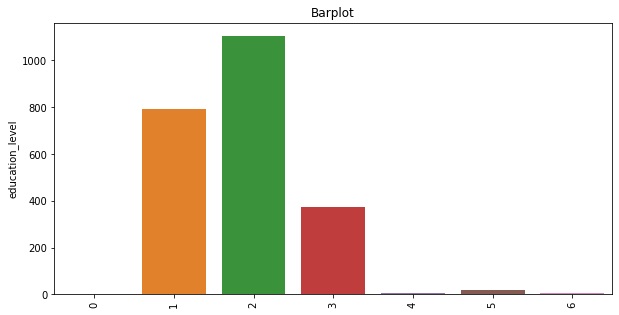

In [64]:
# Check the outliers column education level
diagnostic_plots(X_train_trim['education_level'].value_counts())

In [65]:
# Replace values 0 to 2 as most frequent 
X_train_trim.replace({'education_level':0 }, 2, inplace=True)

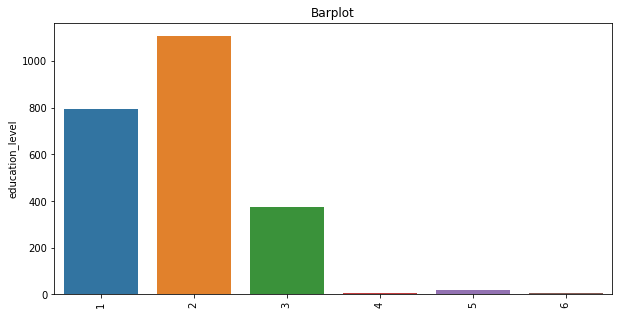

In [66]:
# Check the outliers column education level after imputation
diagnostic_plots(X_train_trim['education_level'].value_counts())

sudah tidak ada outliers di X_train_trim column education level.

### Handling outliers columns marital_status

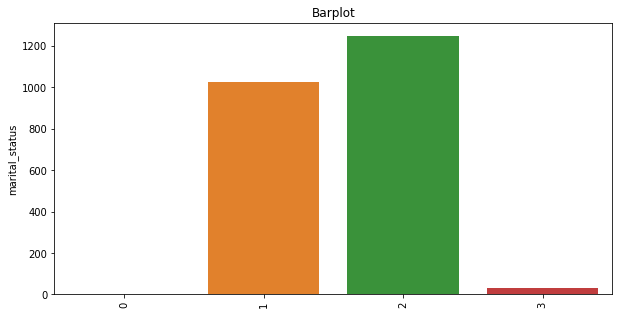

In [67]:
# Check the outliers column marital status
diagnostic_plots(X_train_trim['marital_status'].value_counts())

In [68]:
# Replace values 0 to 2 as most frequent 
X_train_trim.replace({'marital_status':0 }, 2, inplace=True)

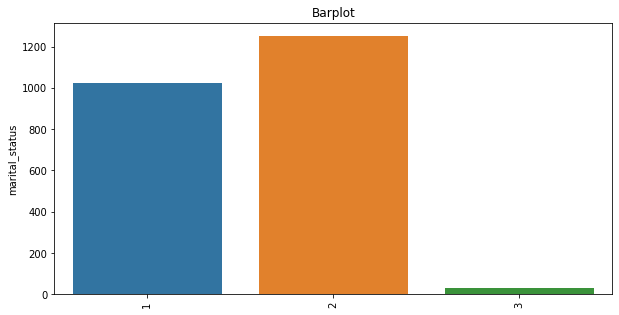

In [69]:
# Check the outliers column marital status after Imputation
diagnostic_plots(X_train_trim['marital_status'].value_counts())

sudah tidak ada nilai marital_status = 0 di X_train.

### Handling outliers columns pay_0 s/d pay_6

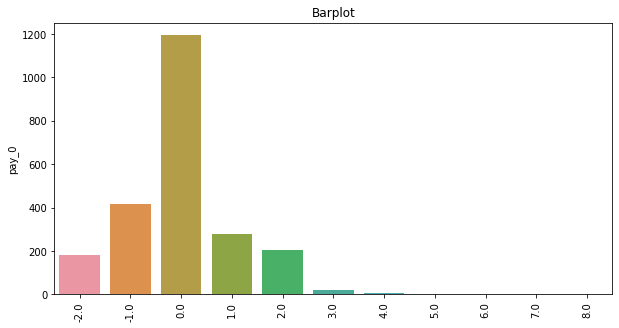

In [70]:
# Check the outliers column marital status befor Imputation
diagnostic_plots(X_train_trim['pay_0'].value_counts())

In [71]:
# Replace values -2 to 0 
X_train_trim.replace({'pay_0':-2,'pay_2':-2,'pay_3':-2,'pay_4':-2,'pay_5':-2,'pay_6':-2 }, 0, inplace=True)

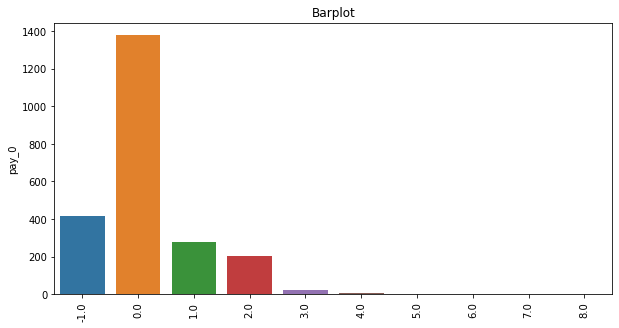

In [72]:
# Check the outliers column marital status after Imputation
diagnostic_plots(X_train_trim['pay_0'].value_counts())

Sudah tidak ada lagi outliers untuk data pay_o s/d pay_6 nilai -2

## Feature Selection

Dikarenakan sudah ada column Percent yang mewakili column bill_amt_1 s/d bill_amt_6 dan pay_amt_1 s/d pay_amt6. Maka untuk columns tersebut akan di drop. Selain itu untuk column dengan korealsi terendah akan di drop juga seperti sex, marital_status, dan age.

In [73]:
X_train.head(1)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,percent_mar,percent_apr,percent_may,percent_june,percent_july,percent_aug
2055,20000.0,2,2,1,27.0,0.0,0.0,0.0,0.0,-1.0,-1.0,10489.0,8652.0,7143.0,6044.0,780.0,116.0,1222.0,1200.0,1004.0,780.0,116.0,806.0,87.418655,100.0,100.0,16.611516,16.799664,14.123902


In [74]:
# Drop columns unnecessary
X_train_trim.drop(['sex','age','bill_amt_1','bill_amt_2',	'bill_amt_3',	'bill_amt_4',	'bill_amt_5',	'bill_amt_6',	'pay_amt_1',	'pay_amt_2',	'pay_amt_3',	'pay_amt_4',	'pay_amt_5',	'pay_amt_6'],axis=1,inplace=True)
X_test.drop(['sex','age','bill_amt_1','bill_amt_2',	'bill_amt_3',	'bill_amt_4',	'bill_amt_5',	'bill_amt_6',	'pay_amt_1',	'pay_amt_2',	'pay_amt_3',	'pay_amt_4',	'pay_amt_5',	'pay_amt_6'],axis=1,inplace=True)

In [75]:
X_train_trim.head(1)

,limit_balance,education_level,marital_status,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,percent_mar,percent_apr,percent_may,percent_june,percent_july,percent_aug
2055,20000.0,2,1,0.0,0.0,0.0,0.0,-1.0,-1.0,87.418655,100.0,100.0,16.611516,16.799664,14.123902


## Feature Scaling

Dikarenakan sebaran datanya tidak normal untuk scaling akan menggunakan MinMax Scaler

In [76]:
# Featue Scaling using MinMaxScaler


scaler = MinMaxScaler()
scaler.fit(X_train_trim)

X_train_trim_scaled = scaler.transform(X_train_trim)
X_test_scaled = scaler.transform(X_test)
X_train_trim_scaled

array([[0.02040816, 0.2       , 0.        , ..., 0.26913194, 0.53166831,
        0.0968732 ],
       [0.71428571, 0.        , 0.5       , ..., 0.60328438, 0.74552643,
        0.51633282],
       [0.30612245, 0.2       , 0.5       , ..., 0.60146458, 0.7443609 ,
        0.51412429],
       ...,
       [0.65306122, 0.        , 0.5       , ..., 0.21497814, 0.49695131,
        0.04301774],
       [0.57142857, 0.        , 0.5       , ..., 0.21803287, 0.50690291,
        0.05716675],
       [0.79591837, 0.2       , 0.        , ..., 0.20964535, 0.54888546,
        0.04345925]])

In [77]:
# Create scaled dataframe
col_headers = list(X_train_trim.columns.values)
X_train_df = pd.DataFrame(X_train_trim_scaled, columns=col_headers) 
X_test_df = pd.DataFrame(X_test_scaled, columns=col_headers) 

In [78]:
X_train_df.head()

,limit_balance,education_level,marital_status,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,percent_mar,percent_apr,percent_may,percent_june,percent_july,percent_aug
0,0.020408,0.2,0.0,0.111111,0.125,0.125,0.125,0.000,0.000,0.712948,0.666667,0.691373,0.269132,0.531668,0.096873
1,0.714286,0.0,0.5,0.000000,0.000,0.000,0.000,0.000,0.125,0.502320,0.334974,0.691722,0.603284,0.745526,0.516333
2,0.306122,0.2,0.5,0.000000,0.000,0.000,0.000,0.000,0.000,0.755175,0.333333,0.691373,0.601465,0.744361,0.514124
3,0.632653,0.2,0.0,0.000000,0.000,0.375,0.000,0.375,0.000,0.615806,0.666667,0.345686,0.603333,0.488722,0.518203
4,0.224490,0.2,0.0,0.111111,0.125,0.125,0.375,0.000,0.000,0.557077,0.666667,0.788118,0.202929,0.698699,0.136192


In [79]:
print('X_train_df', X_train_df.shape)
print('y_train_trim', y_train_trim.shape)

X_train_df (2307, 15)
y_train_trim (2307, 1)


# VI. Model Definition

Pada bagian ini dilakukan definisi model dengan algoritma klasifikasi, diantaranya adalah algoritma berbasis Tree dan essemble dari decision tree, kemudian ada algoritma yang bersifat linear dan ada juga yang berdasarkan jarak dengan tetangganya. 

Untuk metric yang diperhatikan akan dijadikan pertimbangan adalah nilai recall, agar perusahaan bisa lebih concern terhadap hasil true positif, dibanding semua actual positif.

In [80]:
# Logistic regression 
log_model = LogisticRegression()

In [81]:
# SVM Classification 
svc_model = SVC()

In [82]:
# Decision Tree Classification
dtc_model = DecisionTreeClassifier()

In [83]:
# Random forest
rfc_model = RandomForestClassifier()

In [84]:
# KNN Classification
knn_model = KNeighborsClassifier()

In [85]:
# Naive Bayes GB
nb_model = GaussianNB()

In [86]:
# Gradient Boosting Classifier 
gbc_model = GradientBoostingClassifier()

# VII. Model Training

Pada bagian ini akan dilakukan training dengan semua default algoritma, sesuai dengan arahan tugas. Dengan tujuan akan dibandingkan dengan dari hasil crosval.

In [87]:
# Logistic regression 
log_model.fit(X_train_df,y_train_trimmed)

LogisticRegression()

In [88]:
# SVM Classification 
svc_model.fit(X_train_df,y_train_trimmed)

SVC()

In [89]:
# Decision Tree Classication
dtc_model.fit(X_train_df,y_train_trimmed)

DecisionTreeClassifier()

In [90]:
# Random forest
rfc_model.fit(X_train_df,y_train_trimmed)

RandomForestClassifier()

In [91]:
# KNN Classification
knn_model.fit(X_train_df,y_train_trimmed)

KNeighborsClassifier()

In [92]:
# Naive Bayes GB
nb_model.fit(X_train_df,y_train_trimmed)

GaussianNB()

In [93]:
# Gradient Boosting Classifier 
gbc_model.fit(X_train_df,y_train_trimmed)

GradientBoostingClassifier()

# VIII. Model Evaluation

Pada bagian ini dilakukan evaluasi dari setiap model default dan dibandingkan dengan hasil crosval dari algoritmanya. Dari nilai crosval yang paling tinggi akan dipilih dan dilakukan hyper tuning parameter.

## Logistic Regression

specifity Score LR - Train Set  :  0.969545957918051 

F1 Score LR - Train Set  :  0.4182076813655761 

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.97      0.90      1806
           1       0.73      0.29      0.42       501

    accuracy                           0.82      2307
   macro avg       0.78      0.63      0.66      2307
weighted avg       0.81      0.82      0.79      2307
 

Confusion Matrix      : 


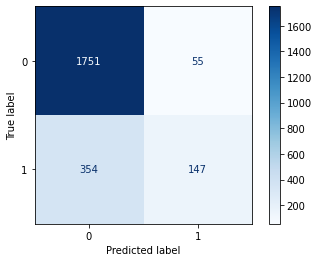

In [94]:
# Check Performance Model against Train-Set
# Logistic regression
log_reg_y_pred_train =log_model.predict(X_train_df)

print('specifity Score LR - Train Set  : ', specificity_score(y_train_trimmed, log_reg_y_pred_train), '\n')
print('F1 Score LR - Train Set  : ', f1_score(y_train_trimmed, log_reg_y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train_trimmed, log_reg_y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(log_model, X_train_df, y_train_trimmed, cmap='Blues'))

In [95]:
# Cross Validation using `cross_val_score` logistic regression

%%time
from sklearn.model_selection import cross_val_score

lr_f1_score_train_cross_val = cross_val_score(log_model, 
                                           X_train_df, 
                                           y_train_trimmed,
                                           cv=5, 
                                           scoring='recall')

print('Recall Score LR - All - Cross Validation  : ', lr_f1_score_train_cross_val)
print('Recall Score LR- Mean - Cross Validation : ', lr_f1_score_train_cross_val.mean())
print('Recall Score LR- Std - Cross Validation  : ', lr_f1_score_train_cross_val.std())
print('Recall Score LR- Range of Test-Set       : ', (lr_f1_score_train_cross_val.mean()-lr_f1_score_train_cross_val.std()) , '-', (lr_f1_score_train_cross_val.mean()+lr_f1_score_train_cross_val.std()))

Recall Score LR - All - Cross Validation  :  [0.28712871 0.28       0.34       0.32       0.19      ]
Recall Score LR- Mean - Cross Validation :  0.28342574257425746
Recall Score LR- Std - Cross Validation  :  0.05155994566769026
Recall Score LR- Range of Test-Set       :  0.2318657969065672 - 0.33498568824194774
CPU times: user 246 ms, sys: 140 ms, total: 386 ms
Wall time: 619 ms


Specificity Score LR- Test Set   :  0.9721030042918455 

F1 Score LR- Test Set   :  0.3815028901734104 

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.97      0.89       466
           1       0.72      0.26      0.38       127

    accuracy                           0.82       593
   macro avg       0.77      0.62      0.64       593
weighted avg       0.80      0.82      0.78       593
 

Confusion Matrix      : 


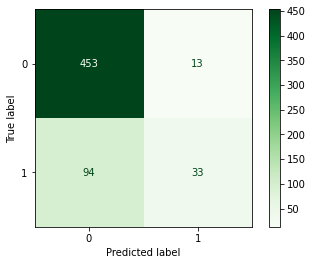

In [96]:
# Check Performance Model against Test-Set

log_y_pred_test = log_model.predict(X_test_df)

print('Specificity Score LR- Test Set   : ', specificity_score(y_test, log_y_pred_test), '\n')
print('F1 Score LR- Test Set   : ', f1_score(y_test, log_y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, log_y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(log_model, X_test_df, y_test, cmap='Greens'))

Dari hasil test confusion matrix logistic regression, terlihat sebanyak 94 data yang sebenarnya gagal bayar (actual positif) namun terprediksi tidak gagal bayar (negatif) dibanding dari total 127 actual positif atau disebut dengan nilai recal, dan nilainya sangat rendah yaitu 26%. Hal ini sangat merugikan perusahaan karena akan terjadi loss, perusahaan menduga tidak gagal bayar, namun ternyata gagal bayar. 


## SVM

specifity Score SVM - Train Set  :  0.9529346622369879 

F1 Score SVC- Train Set  :  0.5276381909547738 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      1806
           1       0.71      0.42      0.53       501

    accuracy                           0.84      2307
   macro avg       0.78      0.69      0.71      2307
weighted avg       0.82      0.84      0.82      2307
 

Confusion Matrix      : 


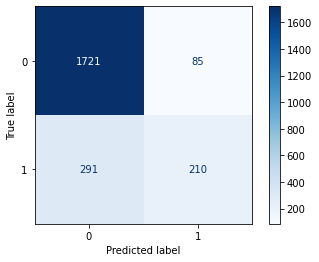

In [97]:
# Check Performance Model against Train-Set
# Support Vector Classifier
svc_y_pred_train =svc_model.predict(X_train_df)

print('specifity Score SVM - Train Set  : ', specificity_score(y_train_trimmed, svc_y_pred_train), '\n')
print('F1 Score SVC- Train Set  : ', f1_score(y_train_trimmed, svc_y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train_trimmed, svc_y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svc_model, X_train_df, y_train_trimmed, cmap='Blues'))

In [98]:
# Cross Validation using `cross_val_score` SVM

%%time
from sklearn.model_selection import cross_val_score

svc_f1_score_train_cross_val = cross_val_score(svc_model, 
                                           X_train_df, 
                                           y_train_trimmed, 
                                           cv=5,
                                           scoring='recall')

print('Recall Score SVC- All - Cross Validation  : ', svc_f1_score_train_cross_val)
print('Recall Score SVC- Mean - Cross Validation : ', svc_f1_score_train_cross_val.mean())
print('Recall Score SVC- Std - Cross Validation  : ', svc_f1_score_train_cross_val.std())
print('Recall Score SVC- Range of Test-Set       : ', (svc_f1_score_train_cross_val.mean()-svc_f1_score_train_cross_val.std()) , '-', (svc_f1_score_train_cross_val.mean()+svc_f1_score_train_cross_val.std()))

Recall Score SVC- All - Cross Validation  :  [0.31683168 0.38       0.47       0.43       0.25      ]
Recall Score SVC- Mean - Cross Validation :  0.36936633663366336
Recall Score SVC- Std - Cross Validation  :  0.07864459583265089
Recall Score SVC- Range of Test-Set       :  0.2907217408010125 - 0.44801093246631424
CPU times: user 1.1 s, sys: 30.9 ms, total: 1.13 s
Wall time: 1.98 s


Specificity Score SVM- Test Set   :  0.9420600858369099 

F1 Score SVC - Test Set   :  0.4444444444444444 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89       466
           1       0.62      0.35      0.44       127

    accuracy                           0.81       593
   macro avg       0.73      0.64      0.67       593
weighted avg       0.79      0.81      0.79       593
 

Confusion Matrix      : 


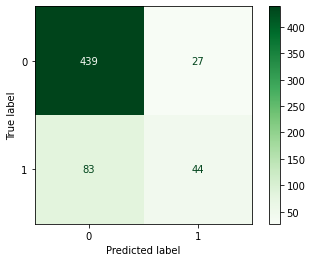

In [99]:
# Check Performance Model against Test-Set

svc_y_pred_test = svc_model.predict(X_test_df)

print('Specificity Score SVM- Test Set   : ', specificity_score(y_test, svc_y_pred_test), '\n')
print('F1 Score SVC - Test Set   : ', f1_score(y_test, svc_y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, svc_y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svc_model, X_test_df, y_test, cmap='Greens'))

Untuk SVM dari hasil test terlihat lebih sedikit kesalahan false positifnya, yaitu sebanyak 83 dibanding logistic regresseion. Untuk persentase nilai recallnya 31% prediksi yang benar gagal bayar dari aktual gagal bayarnya.

## Decision Tree Classification

specifity Score DCT - Train Set  :  1.0 

F1 Score DTC - Train Set  :  0.992964824120603 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1806
           1       1.00      0.99      0.99       501

    accuracy                           1.00      2307
   macro avg       1.00      0.99      1.00      2307
weighted avg       1.00      1.00      1.00      2307
 

Confusion Matrix      : 


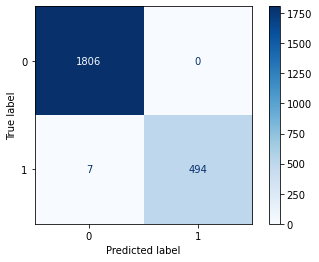

In [100]:
# Check Performance Model against Train-Set Decision tree
# Decision Tree Classifier
dtc_y_pred_train =dtc_model.predict(X_train_df)

print('specifity Score DCT - Train Set  : ', specificity_score(y_train_trimmed, dtc_y_pred_train), '\n')
print('F1 Score DTC - Train Set  : ', f1_score(y_train_trimmed, dtc_y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train_trimmed, dtc_y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dtc_model, X_train_df, y_train_trimmed, cmap='Blues'))

In [101]:
# Cross Validation using `cross_val_score`

%%time
from sklearn.model_selection import cross_val_score

dtc_f1_score_train_cross_val = cross_val_score(dtc_model, 
                                           X_train_df, 
                                           y_train_trimmed,
                                           cv=5, 
                                           scoring='recall')

print('Recall Score DTC- All - Cross Validation  : ', dtc_f1_score_train_cross_val)
print('Recall Score DTC- Mean - Cross Validation : ', dtc_f1_score_train_cross_val.mean())
print('Recall Score DTC- Std - Cross Validation  : ', dtc_f1_score_train_cross_val.std())
print('Recall Score DTC- Range of Test-Set       : ', (dtc_f1_score_train_cross_val.mean()-dtc_f1_score_train_cross_val.std()) , '-', (dtc_f1_score_train_cross_val.mean()+dtc_f1_score_train_cross_val.std()))

Recall Score DTC- All - Cross Validation  :  [0.3960396 0.41      0.47      0.44      0.39     ]
Recall Score DTC- Mean - Cross Validation :  0.4212079207920792
Recall Score DTC- Std - Cross Validation  :  0.02988914590675009
Recall Score DTC- Range of Test-Set       :  0.3913187748853291 - 0.45109706669882926
CPU times: user 169 ms, sys: 0 ns, total: 169 ms
Wall time: 229 ms


Specificity Score DTC- Test Set   :  0.796137339055794 

F1 Score DTC- Test Set   :  0.38545454545454544 

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.80      0.81       466
           1       0.36      0.42      0.39       127

    accuracy                           0.72       593
   macro avg       0.60      0.61      0.60       593
weighted avg       0.73      0.72      0.72       593
 

Confusion Matrix      : 


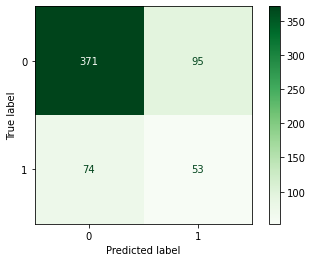

In [102]:
# Check Performance Model against Test-Set

dtc_y_pred_test = dtc_model.predict(X_test_df)

print('Specificity Score DTC- Test Set   : ', specificity_score(y_test, dtc_y_pred_test), '\n')
print('F1 Score DTC- Test Set   : ', f1_score(y_test, dtc_y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, dtc_y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dtc_model, X_test_df, y_test, cmap='Greens'))

Untuk decision tre, nilai recallnya lebih baik daripada SVC dan logistic regression, dengan nilai yaitu 42%.

## Random forest




specifity Score RFC - Train Set  :  0.9988925802879292 

F1 Score RFC - Train Set  :  0.9929929929929929 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1806
           1       1.00      0.99      0.99       501

    accuracy                           1.00      2307
   macro avg       1.00      0.99      1.00      2307
weighted avg       1.00      1.00      1.00      2307
 

Confusion Matrix      : 


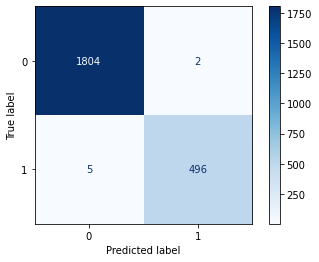

In [103]:
# Check Performance Model against Train-Set Random forest


rfc_y_pred_train =rfc_model.predict(X_train_df)

print('specifity Score RFC - Train Set  : ', specificity_score(y_train_trimmed, rfc_y_pred_train), '\n')
print('F1 Score RFC - Train Set  : ', f1_score(y_train_trimmed, rfc_y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train_trimmed, rfc_y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rfc_model, X_train_df, y_train_trimmed, cmap='Blues'))

In [104]:
# Cross Validation using `cross_val_score`

%%time
from sklearn.model_selection import cross_val_score

rfc_f1_score_train_cross_val = cross_val_score(rfc_model, 
                                           X_train_df, 
                                           y_train_trimmed,
                                           cv=5, 
                                           scoring='recall')

print('Recall Score RFC- All - Cross Validation  : ', rfc_f1_score_train_cross_val)
print('Recall Score RFC- Mean - Cross Validation : ', rfc_f1_score_train_cross_val.mean())
print('Recall Score RFC- Std - Cross Validation  : ', rfc_f1_score_train_cross_val.std())
print('Recall Score RFC- Range of Test-Set       : ', (rfc_f1_score_train_cross_val.mean()-rfc_f1_score_train_cross_val.std()) , '-', (rfc_f1_score_train_cross_val.mean()+rfc_f1_score_train_cross_val.std()))

Recall Score RFC- All - Cross Validation  :  [0.35643564 0.4        0.48       0.4        0.39      ]
Recall Score RFC- Mean - Cross Validation :  0.4052871287128713
Recall Score RFC- Std - Cross Validation  :  0.0406400898166317
Recall Score RFC- Range of Test-Set       :  0.3646470388962396 - 0.445927218529503
CPU times: user 3.8 s, sys: 13.5 ms, total: 3.82 s
Wall time: 7.57 s


Specificity Score RFC- Test Set   :  0.944206008583691 

F1 Score RFC- Test Set   :  0.4926108374384237 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.94      0.90       466
           1       0.66      0.39      0.49       127

    accuracy                           0.83       593
   macro avg       0.75      0.67      0.69       593
weighted avg       0.81      0.83      0.81       593
 

Confusion Matrix      : 


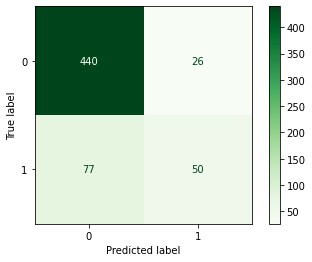

In [105]:
# Check Performance Model against Test-Set

rfc_y_pred_test = rfc_model.predict(X_test_df)

print('Specificity Score RFC- Test Set   : ', specificity_score(y_test, rfc_y_pred_test), '\n')
print('F1 Score RFC- Test Set   : ', f1_score(y_test, rfc_y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, rfc_y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rfc_model, X_test_df, y_test, cmap='Greens'))

Untuk random forest ada sebanyak 77 data prediksi yang diduga tidak gagal bayar namun gagal bayar. Dengan nilai recal 39%

## KNN Classification




specifity Score KNN - Train Set  :  0.9634551495016611 

F1 Score KNN - Train Set  :  0.5860349127182045 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1806
           1       0.78      0.47      0.59       501

    accuracy                           0.86      2307
   macro avg       0.82      0.72      0.75      2307
weighted avg       0.85      0.86      0.84      2307
 

Confusion Matrix      : 


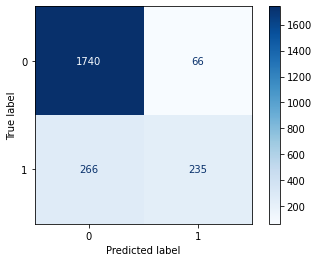

In [106]:
# Check Performance Model against Train-Set KNN Classification

knn_y_pred_train =knn_model.predict(X_train_df)

print('specifity Score KNN - Train Set  : ', specificity_score(y_train_trimmed, knn_y_pred_train), '\n')
print('F1 Score KNN - Train Set  : ', f1_score(y_train_trimmed, knn_y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train_trimmed, knn_y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_model, X_train_df, y_train_trimmed, cmap='Blues'))

In [107]:
# Cross Validation using `cross_val_score`

%%time
from sklearn.model_selection import cross_val_score

knn_f1_score_train_cross_val = cross_val_score(knn_model, 
                                           X_train_df, 
                                           y_train_trimmed,
                                           cv=5, 
                                           scoring='recall')

print('Recall Score KNN- All - Cross Validation  : ', knn_f1_score_train_cross_val)
print('Recall Score KNN- Mean - Cross Validation : ', knn_f1_score_train_cross_val.mean())
print('Recall Score KNN- Std - Cross Validation  : ', knn_f1_score_train_cross_val.std())
print('Recall Score KNN- Range of Test-Set       : ', (knn_f1_score_train_cross_val.mean()-knn_f1_score_train_cross_val.std()) , '-', (knn_f1_score_train_cross_val.mean()+knn_f1_score_train_cross_val.std()))

Recall Score KNN- All - Cross Validation  :  [0.2970297 0.41      0.5       0.38      0.3      ]
Recall Score KNN- Mean - Cross Validation :  0.3774059405940594
Recall Score KNN- Std - Cross Validation  :  0.07556510367648468
Recall Score KNN- Range of Test-Set       :  0.30184083691757474 - 0.4529710442705441
CPU times: user 283 ms, sys: 1.65 ms, total: 285 ms
Wall time: 426 ms


Specificity Score KNN- Test Set   :  0.9377682403433476 

F1 Score KNN- Test Set   :  0.4242424242424243 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.94      0.88       466
           1       0.59      0.33      0.42       127

    accuracy                           0.81       593
   macro avg       0.71      0.63      0.65       593
weighted avg       0.78      0.81      0.79       593
 

Confusion Matrix      : 


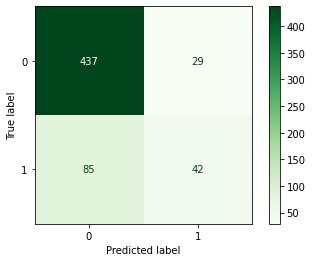

In [108]:
# Check Performance Model against Test-Set

knn_y_pred_test = knn_model.predict(X_test_df)

print('Specificity Score KNN- Test Set   : ', specificity_score(y_test, knn_y_pred_test), '\n')
print('F1 Score KNN- Test Set   : ', f1_score(y_test, knn_y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, knn_y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_model, X_test_df, y_test, cmap='Greens'))

Untuk KNN nilai recallnya 33% atau cukup rendah dibanding algrotitma decision tree dan random forest.

## Naive Bayes GB




specifity Score NB - Train Set  :  0.8781838316722038 

F1 Score NB - Train Set  :  0.5522088353413656 

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      1806
           1       0.56      0.55      0.55       501

    accuracy                           0.81      2307
   macro avg       0.72      0.71      0.71      2307
weighted avg       0.81      0.81      0.81      2307
 

Confusion Matrix      : 


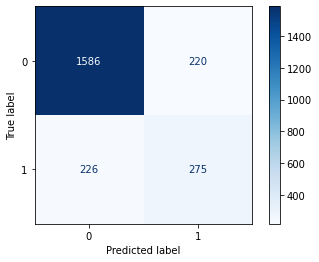

In [109]:
# Check Performance Model against Train-Set Naive Bayes GB

nb_y_pred_train =nb_model.predict(X_train_df)

print('specifity Score NB - Train Set  : ', specificity_score(y_train_trimmed, nb_y_pred_train), '\n')
print('F1 Score NB - Train Set  : ', f1_score(y_train_trimmed, nb_y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train_trimmed, nb_y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(nb_model, X_train_df, y_train_trimmed, cmap='Blues'))

In [110]:
# Cross Validation using `cross_val_score`

%%time
from sklearn.model_selection import cross_val_score

nb_f1_score_train_cross_val = cross_val_score(nb_model, 
                                           X_train_df, 
                                           y_train_trimmed,
                                           cv=5, 
                                           scoring='recall')

print('Recall Score NB- All - Cross Validation  : ', nb_f1_score_train_cross_val)
print('Recall Score NB- Mean - Cross Validation : ', nb_f1_score_train_cross_val.mean())
print('Recall Score Nb- Std - Cross Validation  : ', nb_f1_score_train_cross_val.std())
print('Recall Score NB- Range of Test-Set       : ', (nb_f1_score_train_cross_val.mean()-nb_f1_score_train_cross_val.std()) , '-', (nb_f1_score_train_cross_val.mean()+nb_f1_score_train_cross_val.std()))

Recall Score NB- All - Cross Validation  :  [0.44554455 0.57       0.67       0.57       0.47      ]
Recall Score NB- Mean - Cross Validation :  0.545108910891089
Recall Score Nb- Std - Cross Validation  :  0.0804876715286942
Recall Score NB- Range of Test-Set       :  0.46462123936239486 - 0.6255965824197832
CPU times: user 47.7 ms, sys: 125 µs, total: 47.9 ms
Wall time: 50.9 ms


Specificity Score NB- Test Set   :  0.7832618025751072 

F1 Score NB- Test Set   :  0.48504983388704315 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.78      0.82       466
           1       0.42      0.57      0.49       127

    accuracy                           0.74       593
   macro avg       0.65      0.68      0.65       593
weighted avg       0.77      0.74      0.75       593
 

Confusion Matrix      : 


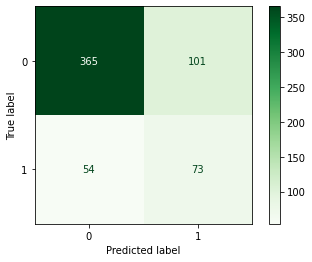

In [111]:
# Check Performance Model against Test-Set

nb_y_pred_test = nb_model.predict(X_test_df)

print('Specificity Score NB- Test Set   : ', specificity_score(y_test, nb_y_pred_test), '\n')
print('F1 Score NB- Test Set   : ', f1_score(y_test, nb_y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, nb_y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(nb_model, X_test_df, y_test, cmap='Greens'))

Naive bayes adalah algoritma yang paling sedikit kesalahan memprediksi false negatif, atau 54 data yang dianggap tidak gagal bayar, namun ternyata gagal bayar. Dengan nilai recallnya 57%.

## Gradient Boosting Classifier




specifity Score GBC - Train Set  :  0.969545957918051 

F1 Score GBC - Train Set  :  0.61 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1806
           1       0.82      0.49      0.61       501

    accuracy                           0.86      2307
   macro avg       0.84      0.73      0.76      2307
weighted avg       0.86      0.86      0.85      2307
 

Confusion Matrix      : 


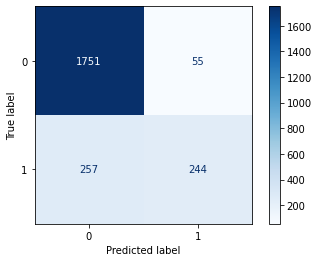

In [112]:
# Check Performance Model against Train-Set Gradient Boosting Classifier

gbc_y_pred_train =gbc_model.predict(X_train_df)

print('specifity Score GBC - Train Set  : ', specificity_score(y_train_trimmed, gbc_y_pred_train), '\n')
print('F1 Score GBC - Train Set  : ', f1_score(y_train_trimmed, gbc_y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train_trimmed, gbc_y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(gbc_model, X_train_df, y_train_trimmed, cmap='Blues'))

In [113]:
# Cross Validation using `cross_val_score`

%%time
from sklearn.model_selection import cross_val_score

gbc_f1_score_train_cross_val = cross_val_score(gbc_model, 
                                           X_train_df, 
                                           y_train_trimmed,
                                           cv=5, 
                                           scoring='recall')

print('Recall Score GBC- All - Cross Validation  : ', gbc_f1_score_train_cross_val)
print('Recall Score GBC- Mean - Cross Validation : ', gbc_f1_score_train_cross_val.mean())
print('Recall Score GBC- Std - Cross Validation  : ', gbc_f1_score_train_cross_val.std())
print('Recall Score GBC- Range of Test-Set       : ', (gbc_f1_score_train_cross_val.mean()-gbc_f1_score_train_cross_val.std()) , '-', (gbc_f1_score_train_cross_val.mean()+gbc_f1_score_train_cross_val.std()))

Recall Score GBC- All - Cross Validation  :  [0.34653465 0.43       0.47       0.46       0.39      ]
Recall Score GBC- Mean - Cross Validation :  0.4193069306930693
Recall Score GBC- Std - Cross Validation  :  0.04581431089983931
Recall Score GBC- Range of Test-Set       :  0.37349261979323 - 0.4651212415929086
CPU times: user 2.66 s, sys: 8.7 ms, total: 2.67 s
Wall time: 2.69 s


Specificity Score GBC- Test Set   :  0.9463519313304721 

F1 Score GBC- Test Set   :  0.5170731707317073 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90       466
           1       0.68      0.42      0.52       127

    accuracy                           0.83       593
   macro avg       0.77      0.68      0.71       593
weighted avg       0.82      0.83      0.82       593
 

Confusion Matrix      : 


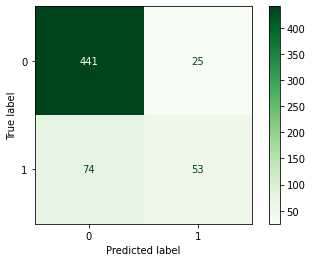

In [114]:
# Check Performance Model against Test-Set

gbc_y_pred_test = gbc_model.predict(X_test_df)

print('Specificity Score GBC- Test Set   : ', specificity_score(y_test, gbc_y_pred_test), '\n')
print('F1 Score GBC- Test Set   : ', f1_score(y_test, gbc_y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, gbc_y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(gbc_model, X_test_df, y_test, cmap='Greens'))

Nila recall gradient boosting memiliki kesamaan dengan decision tree, dan random forest, yaitu 42%.

## All Baseline Report

In [115]:
# Save all evaluation into dataframe 'baseline'
baseline_reports = {}
train_acuracy = {
    'logistic regression': accuracy_score(y_train_trimmed, log_reg_y_pred_train),
    'SVM': accuracy_score(y_train_trimmed, svc_y_pred_train),
    'Decision Tre': accuracy_score(y_train_trimmed, svc_y_pred_train),
    'Random Forest': accuracy_score(y_train_trimmed, rfc_y_pred_train),
    'KNN': accuracy_score(y_train_trimmed, knn_y_pred_train),
    'Naive Bayes GB': accuracy_score(y_train_trimmed, nb_y_pred_train),
    'Gradient Boosting':accuracy_score(y_train_trimmed, gbc_y_pred_train)
}

test_acuracy = {
    'logistic regression': accuracy_score(y_test, log_y_pred_test),
    'SVM': accuracy_score(y_test, svc_y_pred_test),
    'Decision Tre': accuracy_score(y_test, dtc_y_pred_test),
    'Random Forest': accuracy_score(y_test, rfc_y_pred_test),
    'KNN': accuracy_score(y_test, knn_y_pred_test),
    'Naive Bayes GB': accuracy_score(y_test, nb_y_pred_test),
    'Gradient Boosting':accuracy_score(y_test, gbc_y_pred_test)
}

train_recall = {
    'logistic regression': recall_score(y_train_trimmed, log_reg_y_pred_train),
    'SVM': recall_score(y_train_trimmed, svc_y_pred_train),
    'Decision Tre': recall_score(y_train_trimmed, svc_y_pred_train),
    'Random Forest': recall_score(y_train_trimmed, rfc_y_pred_train),
    'KNN': recall_score(y_train_trimmed, knn_y_pred_train),
    'Naive Bayes GB': recall_score(y_train_trimmed, nb_y_pred_train),
    'Gradient Boosting':recall_score(y_train_trimmed, gbc_y_pred_train)
}

test_recall = {
    'logistic regression': recall_score(y_test, log_y_pred_test),
    'SVM': recall_score(y_test, svc_y_pred_test),
    'Decision Tre': recall_score(y_test, dtc_y_pred_test),
    'Random Forest': recall_score(y_test, rfc_y_pred_test),
    'KNN': recall_score(y_test, knn_y_pred_test),
    'Naive Bayes GB': recall_score(y_test, nb_y_pred_test),
    'Gradient Boosting':recall_score(y_test, gbc_y_pred_test)
}

train_f1_score = {
    'logistic regression': f1_score(y_train_trimmed, log_reg_y_pred_train),
    'SVM': f1_score(y_train_trimmed, svc_y_pred_train),
    'Decision Tre': f1_score(y_train_trimmed, svc_y_pred_train),
    'Random Forest': f1_score(y_train_trimmed, rfc_y_pred_train),
    'KNN': f1_score(y_train_trimmed, knn_y_pred_train),
    'Naive Bayes GB': f1_score(y_train_trimmed, nb_y_pred_train),
    'Gradient Boosting':f1_score(y_train_trimmed, gbc_y_pred_train)
}

recall_mean_crosVal = {
    'logistic regression': lr_f1_score_train_cross_val.mean(),
    'SVM': svc_f1_score_train_cross_val.mean(),
    'Decision Tre': dtc_f1_score_train_cross_val.mean(),
    'Random Forest': rfc_f1_score_train_cross_val.mean(),
    'KNN': knn_f1_score_train_cross_val.mean(),
    'Naive Bayes GB': nb_f1_score_train_cross_val.mean(),
    'Gradient Boosting':gbc_f1_score_train_cross_val.mean()
}

recall_std_crosVal = {
    'logistic regression': lr_f1_score_train_cross_val.std(),
    'SVM': svc_f1_score_train_cross_val.std(),
    'Decision Tre': dtc_f1_score_train_cross_val.std(),
    'Random Forest': rfc_f1_score_train_cross_val.std(),
    'KNN': knn_f1_score_train_cross_val.std(),
    'Naive Bayes GB': nb_f1_score_train_cross_val.std(),
    'Gradient Boosting':gbc_f1_score_train_cross_val.std()
}



test_f1_score = {
    'logistic regression': f1_score(y_test, log_y_pred_test),
    'SVM': f1_score(y_test, svc_y_pred_test),
    'Decision Tre': f1_score(y_test, dtc_y_pred_test),
    'Random Forest': f1_score(y_test, rfc_y_pred_test),
    'KNN': f1_score(y_test, knn_y_pred_test),
    'Naive Bayes GB': f1_score(y_test, nb_y_pred_test),
    'Gradient Boosting':f1_score(y_test, gbc_y_pred_test)
}

baseline_reports['train_acuracy'] = train_acuracy
baseline_reports['test_acuracy'] = test_acuracy
baseline_reports['train_recall'] = train_recall
baseline_reports['recall_mean_crosVal'] = recall_mean_crosVal
baseline_reports['recall_std_crosVal'] = recall_std_crosVal
baseline_reports['test_recall'] = test_recall
baseline_reports['train_f1_score'] = train_f1_score
baseline_reports['test_f1_score'] = test_f1_score
baseline = pd.DataFrame(baseline_reports)


In [116]:
baseline.sort_values(by='recall_mean_crosVal', ascending=False)

,train_acuracy,test_acuracy,train_recall,recall_mean_crosVal,recall_std_crosVal,test_recall,train_f1_score,test_f1_score
Naive Bayes GB,0.806675,0.738617,0.548902,0.545109,0.080488,0.574803,0.552209,0.485050
Decision Tre,0.837018,0.715008,0.419162,0.421208,0.029889,0.417323,0.527638,0.385455
Gradient Boosting,0.864759,0.833052,0.487026,0.419307,0.045814,0.417323,0.610000,0.517073
Random Forest,0.996966,0.826307,0.990020,0.405287,0.040640,0.393701,0.992993,0.492611
KNN,0.856090,0.807757,0.469062,0.377406,0.075565,0.330709,0.586035,0.424242
SVM,0.837018,0.814503,0.419162,0.369366,0.078645,0.346457,0.527638,0.444444
logistic regression,0.822713,0.819562,0.293413,0.283426,0.051560,0.259843,0.418208,0.381503


Berdasarkan cross val score recall mean tertinggi yaitu di algoritma Naive Bayes GB dengan nilai 54.5%. Namun bila dibandingkan dengan nilai train_recal_score, Naive Bayes testnya lebih tinggi sehingga diduga adanya leakage. Untuk tertinggi ke 2 yaitu Decision tree, namun dibandingkan dengan perbedaan nilai train dan test, terdapat perbedaan yang cukup jauh sehingga terlihat over fit.

Berdasarkan kondisi diatas, maka yang dilakukan hypertuning adalah gradient boosting dengan nilai recall crosval meannya 41,93 % urutan ke 3, namun kondisi modelnya tidak over fit
bila dibandingkan dengan metric lain, dimana kondisi nilai antara train dan testnya tidak jauh dan cendrung good fit.

Dari segi objective di awal, yaitu mencari recall score terbaik untuk menghindari kerugian customer tidak bayar karena salah terprediksi tidak gagal bayar namun ternyata gagal bayar, maka algoritma yang terbaik adalah naive bayes, dengan recall score test 57.49% dan trainnya 54.89%. selisih 3% lebih baik testnya. Hal ini diperkirakan adanya leakage sehingga nilai testnya lebih baik. 

Dari segi proses waktu untuk melakukan crossval scorenya, algoritma yang paling lama adalah random forest dengan lama 8 detik dan yang paling cepat adalah Naive Bayes hanya 237 ms.

Kelebihan dari model ini adalah lebih tepat dalam memprediksi true negatif dikarenakan datanya yang tidak balance, sehingga nilai specificity nya jauh lebih besar dibanding recall. Kelemahannya adalah masih dapat memberikan nilai loss pada perusahaan bila memaksakan menggunakan model ini, karena masih terdapat sebanyak 49-50% data customer yang diduga tidak gagal bayar namun gagal bayar.
 


## Hyperparameter Tuning Gradientboosting

In [117]:
# Hyperparameter Tuning : Random Search

from sklearn.model_selection import RandomizedSearchCV

# Define Hyperparameters
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num = 10)]
max_features = [1.0]
max_depth = [int(x) for x in np.linspace(5, 1000, 10)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]
random_grid = {'n_estimators': n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':['friedman_mse','squared_error']}
random_grid

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'max_features': [1.0],
 'max_depth': [5, 115, 226, 336, 447, 557, 668, 778, 889, 1000],
 'min_samples_split': [2, 5, 10, 14],
 'min_samples_leaf': [1, 2, 4, 6, 8],
 'criterion': ['friedman_mse', 'squared_error']}

In [118]:
# Train with Random Search
%%time

gbc_randomcv = RandomizedSearchCV(estimator=GradientBoostingClassifier(), 
                                 param_distributions=random_grid,
                                 n_iter=50,
                                 cv=5, 
                                 random_state=19, 
                                 n_jobs=-1, 
                                 scoring='f1')
gbc_randomcv.fit(X_train_df, y_train_trimmed)

CPU times: user 43.2 s, sys: 2.65 s, total: 45.8 s
Wall time: 50min 50s


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'max_depth': [5, 115, 226, 336, 447,
                                                      557, 668, 778, 889,
                                                      1000],
                                        'max_features': [1.0],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=19, scoring='f1')

In [119]:
gbc_randomcv.best_params_

{'n_estimators': 700,
 'min_samples_split': 14,
 'min_samples_leaf': 6,
 'max_features': 1.0,
 'max_depth': 1000,
 'criterion': 'friedman_mse'}

In [120]:
gbc_randomcv_best = gbc_randomcv.best_estimator_

F1 Score - Test Set   :  0.46288209606986896 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       466
           1       0.52      0.42      0.46       127

    accuracy                           0.79       593
   macro avg       0.68      0.66      0.67       593
weighted avg       0.78      0.79      0.78       593
 

Confusion Matrix      : 


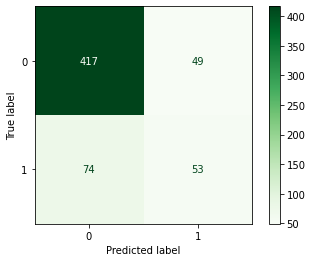

In [125]:
# Check Performance Model against Test-Set

y_pred_test = gbc_randomcv_best.predict(X_test_df)


print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(gbc_randomcv_best, X_test_df, y_test, cmap='Greens'))

Dari hasil RandomizedSearch diketahui bahwa best param dari gradient boosting  dengan criterion 'friedman_mse', n-estimator sebanyak 700 didapatkan hasil nilai recal 42% atau lebih baik sedikit dibanding dengan default

## Conceptual Problems
1. Criterion Decision tree adalah tehnik algoritma dalam melakukan split ke akarnya apakah berdasarkan nilai keraguan (entropy) atau berdasarkan impuritynya (gini). Bila berdasarkan gini ketika mencapai impurity 0, atau murni maka model akan menstop split.

2. Prunning adalah proses untuk melakukan pengurangan ukuran pada model tree agar bisa lebih cepat dengan cara menghilangkan bagian dengan data yang tidak berkorelasi dan redundant. 

  Alasannya adalah model decision tre melakukan proses split ke semua bagian feature dan bila dibiarkan tanpa prunning akan sangat lama, karena sebenarnya ada kemungkinan sudah didapatkan nilai pada feature a, kemudian diulang lagi di feature b. sehingga terjadi redundant. 

  Jenisnya adalah pre prunning, post prunning, bottom up prunning, atau top down prunning.

3. Untuk menetukan K pada KNN tahap awalnya adalah melihat dulu klasifikasinya berapa kelas, 2 atau lebih. jika 2, maka pastikan K nya bernilai ganjil 3 atau 5 agar dari dua klasifikasinya menjadi kelompok yang jelas berdasarkan kedekatannya. 

4. Cross validation adalah tehnik memvalidasi nilai score dengan cara membagi data train ke subset yang sudah ditentukan atau fold. bila foldnya 5, atau cv= 5, maka data akan dibagi menjadi 5 bagian, kemudian4 bagian di uji ke nomor 5, dilanjutkan 4 bagian lain diujikan ke nomor 4 dan seterusnya. Nanti akan didapatkan nilai score dari2 masing pengujian. nilai rata2nya yang akan diambil dengan memperhatikan standar deviasinya untuk menentukan ketepatan hasil testnya. semakin kecil nilai std deviasinya semakin baik.

5. metric evaluation:
  * Accuracy adalah scoring dari hasil true psositif dan true negatif dibagi dengan semua data. semakin tinggi semakin baik, namun untuk data yang imbalance accuracy tidak dapat dijadikan metric penilaian, apalagi dengan case yang memiliki sensitivitas.
  * Precision adalah nilai score dari true positif dibandingkan dengan jumlah true posisif dan false positif, semakin tinggi berarti model semakin tepat dalam menentukan nilai prediksi. Metric ini sangat diperhatikan untuk kasus bahwa prediksi positifnya harus tepat, dan apabila salah prediksi menimbulkan kerugian. Seperti orang terprediksi positif narkoba, namun sbenarnya negatif, maka dia akan mendapatkan hukuman tanpa kesalahannya. 
  * Recall adalah membandingkan hasil prediksi true positif dengan aktual positifnya. Hal ini terkait sensitifitas terhadap kesalahan memprediksi negatif, namun ternyata adalah positif dan menimbulkan kerugian atas kesalahan tersebut. Digunakan untuk modelin seperti prediksi terkena sakit, orang yang sebenarnya sakit namun terprediksi tidak sakit dapat membahayakan orang tersebut.
  * F1 score adalah pertengahan antara nilai presisi dan recall, semakin tinggi nilai f1 score, maka nilai recal dan precicy juga akan naik. 



# IX.Model Inference

Pada bagian ini dilakukan input data inference dan dilakukan prediksi dengan algoritma terbaik, yaitu Gradient Boosting. Setelah diinput dilakukan scaling kemudian langsung dilakukan prediksi.

In [129]:
# Create New Data

data_inf = {
    'limit_balance': 100000,
    'education_level': 2,
    'marital_status' : 2,
    'pay_0': 0,
    'pay_2' : 2,
    'pay_3': 2,
    'pay_4': 2,
    'pay_5': 2,
    'pay_6' : 0,
    'percent_mar': 4.5,
    'percent_apr': 4,
    'percent_may': 4,
    'percent_june': 3.5,
    'percent_july' : 4,
    'percent_aug': 4
}

data_inf = pd.DataFrame([data_inf])
data_inf

,limit_balance,education_level,marital_status,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,percent_mar,percent_apr,percent_may,percent_june,percent_july,percent_aug
0,100000,2,2,0,2,2,2,2,0,4.5,4,4,3.5,4,4


In [130]:
data_inf_num_scaled = scaler.transform(data_inf)
data_inf_final = pd.DataFrame(data_inf_num_scaled, columns=col_headers) 
data_inf_final

,limit_balance,education_level,marital_status,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,percent_mar,percent_apr,percent_may,percent_june,percent_july,percent_aug
0,0.183673,0.2,0.5,0.111111,0.375,0.375,0.375,0.375,0.125,0.434645,0.346667,0.359514,0.216878,0.498947,0.047684


In [131]:
# Predict inference using SVC Linear Regression 

y_pred_inf = gbc_randomcv_best.predict(data_inf_final)
y_pred_inf

array([1])

Dari hasil tes inference diketahui hasil prediksinya adalah gagal bayar bila dengan kondisi diatas.

# X. Conclusion

Dari hasil EDA diketahui jumlah pengguna Credit card terbanyak adalah female dengan persentase mencapai 60.77%, dari tingkat pendidikan yang terbanyak adalah university, dan marital status terbanyak adalah unmarried. Dari hasil EDA untuk column pay_n, nilai terbanyak adalah 0 dengan keterangan tidak ada repayment namun ditemukan juga ada nilai -2, yang seharusnya tidak ada nilai - 2 bila dilihat dari schema dataset.

Dari proses EDA juga terlihat adanya outliers dari index yang sudah ditentukan seperti di column sex, education level, yang seharusnya tidak ada index 0 namun masih ada index 0. Untuk column yang bersifat  numeric continous, dicek sebarannya diketahui semua column distribusinya skew miring ke kanan.

Dalam proses feature enginering yang dilakukan adalah membuat colum persentase dari jumlah yang dibayar dengan tagihan, sehingga column bill_amt dan pay_amt sudah terwakilkan dan dapat di drop dari features. 

Kemudian dilakukan rekayasa terhadap outliers dengan imputasi ke nilai index tertinggi. Ditemukan juga ada persentase pembayaran melebihi dari 200 persen, sehingga dianggap bukan natural outliers dan dilakukan trimming data outliers, total yang ditrim sekitar 2% dari keseluruhan data.

Untuk proses scaling tetap dilakukan dikarenakan adanya perbedaan yang jauh antara nilai index dengan limit balance dan lainnya. Maka diperlukan scaling dengan MinMax scaler.

Untuk Algoritma yang digunakan adalah multi algoritma, dengan perbedaan basic yaitu dasarnya dengan line, tree, ataupun nilai neighbours. Dari hasil algoritma secara default dan berdasarkan objective maka algoritma naive bayes adalah yang terbaik, dengan nilai recall tertinggi.

Sedangkan dari kategori goodfit, permodelan ini masih tergolong underfit karena nilai recallnya masih di sekitar 49 - 51 %, hal ini dikarenakan datanya tidak balance dan ditemukan adanya ambigous, antara nilai pay_n dengan perbandingan bill_amt vs pay_amt. yang seharusnya krena tidak bayar, pay_n nya jadi 1 atau lebih namun tetap 0. Kemudian ada juga dengan data pay_n semua 0 namun  terdata default payment namun ada juga yang tidak default payment. Atau dapat disimpulkan dataset nya memiliki bias dalam penetapan target. 

Saran kedepan dapat dilakukan hypertuning selain dengan menggunakan random, seperti gridsearch. kemudian lebih jelas lagi untuk dataset, dan dilakukan balancing data dulu agar tidak terlalu jauh perbandingan nilai target.
